In [1]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('pancancerInfo.csv')

In [3]:
data['gender'].replace('MALE',1,inplace= True)
data['gender'].replace('FEMALE',0,inplace= True)
data

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11155,TCGA_D3_A8GR,SKCM,54.0,0,WHITE,Stage 0,Dead,[Not Available],NaN,NaN
11156,TCGA_EE_A183,SKCM,48.0,1,WHITE,Stage 0,Dead,[Not Available],NaN,NaN
11157,TCGA_EE_A20C,SKCM,59.0,1,WHITE,Stage 0,Dead,[Not Available],NaN,NaN
11158,TCGA_EE_A29W,SKCM,42.0,1,WHITE,Stage 0,Alive,[Not Available],NaN,NaN


In [4]:
#Some types doesn't include males so remove their data
types = data.sort_values(by = ['type'])['type'].unique()
ctype = list(types)
type_Male = []
type_Female = []
for i,types in enumerate(types):
    Male = data['gender'] == 1
    Female = data['gender'] == 0
    cancer = data['type'] == types
    No_Male = data.loc[Male & cancer]
    if No_Male.empty:
        print('Male empty :' + types)
        type_Female.append(types)
        ctype.remove(types)
    No_Female = data.loc[Female & cancer]
    if No_Female.empty:
        print('Female empty :' + types)
        type_Male.append(types)
        ctype.remove(types)

Male empty :CESC
Male empty :OV
Female empty :PRAD
Female empty :TGCT
Male empty :UCEC
Male empty :UCS


In [5]:
print(type_Male)
print(type_Female)
print(ctype)

['PRAD', 'TGCT']
['CESC', 'OV', 'UCEC', 'UCS']
['ACC', 'BLCA', 'BRCA', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'PAAD', 'PCPG', 'READ', 'SARC', 'SKCM', 'STAD', 'THCA', 'THYM', 'UVM']


In [6]:
data.isnull().sum()

bcr_patient_barcode                     0
type                                    0
age_at_initial_pathologic_diagnosis    51
gender                                  0
race                                    0
ajcc_pathologic_tumor_stage             0
vital_status                            4
treatment_outcome_first_course         51
Event                                   9
Delay                                  66
dtype: int64

In [7]:
data.dropna(thresh = 10,inplace = True)


In [8]:
data.isnull().sum()

bcr_patient_barcode                    0
type                                   0
age_at_initial_pathologic_diagnosis    0
gender                                 0
race                                   0
ajcc_pathologic_tumor_stage            0
vital_status                           0
treatment_outcome_first_course         0
Event                                  0
Delay                                  0
dtype: int64

In [9]:
data.shape

(11018, 10)

C:\Users\joash\AppData\Local\Temp\ipykernel_15884\1077198687.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 20))


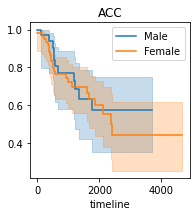

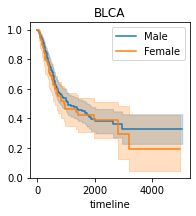

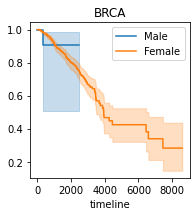

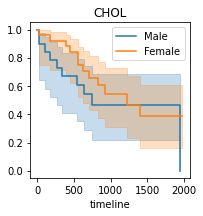

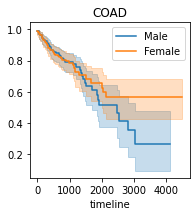

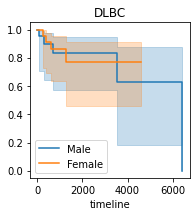

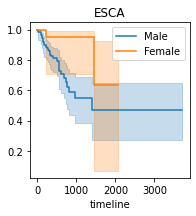

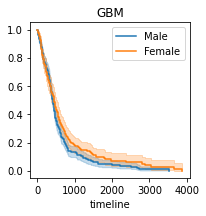

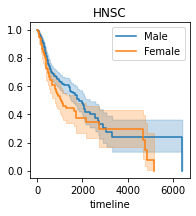

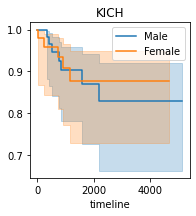

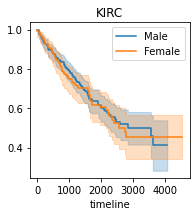

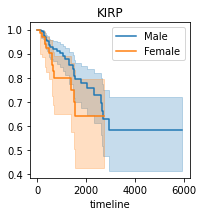

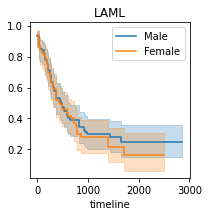

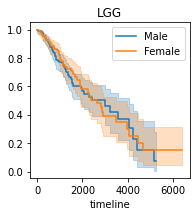

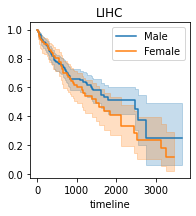

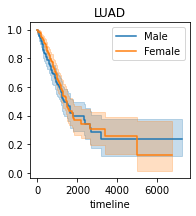

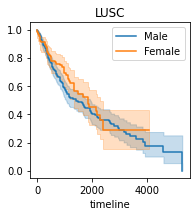

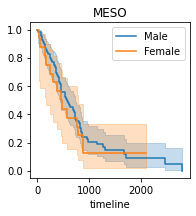

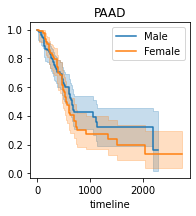

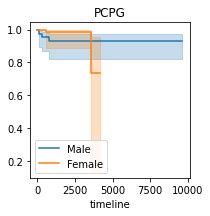

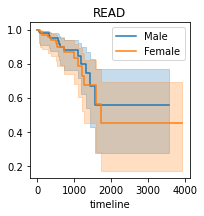

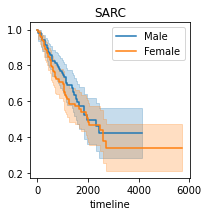

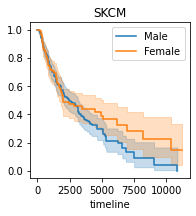

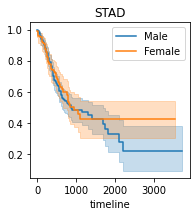

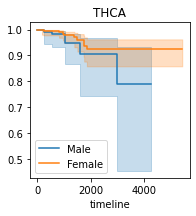

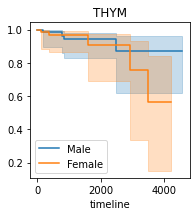

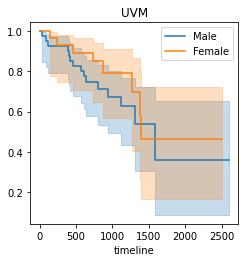

In [82]:
#Graph for data that includes both genders
kmf = KaplanMeierFitter()
E = data['Event']
T = data['Delay']
for i in ctype:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(6,6,ctype.index(i) + 1)
    ix = data['type'] == i 
    m = data['gender'] == 1
    kmf.fit(durations = T[ix][m],event_observed = E[ix][m],label = 'Male')
    kmf.plot_survival_function(ax = ax,legend = True)
    kmf.fit(durations = T[ix][-m],event_observed = E[ix][-m],label = 'Female')
    kmf.plot_survival_function(ax = ax,legend = True)
    plt.title(i)
plt.tight_layout()
plt.show()

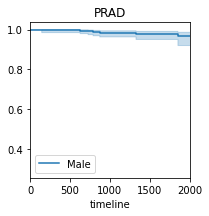

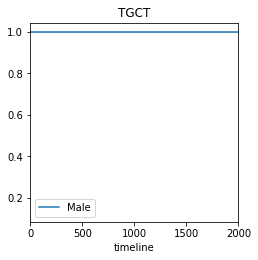

In [11]:
#Plot for gender == Male
for i in type_Male:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(6,6,type_Male.index(i) + 1)
    ix = data['type'] == i 
    m = data['gender'] == 1
    kmf.fit(durations = T[ix][m],event_observed = E[ix][m],label = 'Male')
    kmf.plot_survival_function(ax = ax,legend = True)
    plt.title(i)
    plt.xlim(0,2000)
plt.tight_layout()
plt.show()

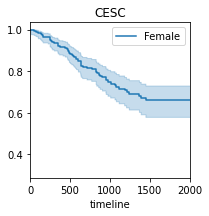

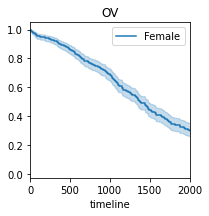

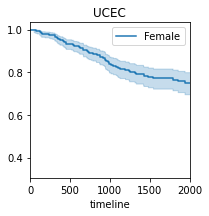

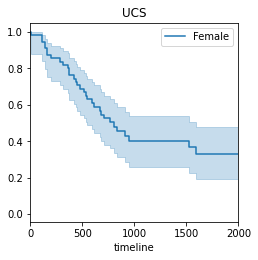

In [12]:
#Plot for gender == Male
for i in type_Female:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(6,6,type_Female.index(i) + 1)
    ix = data['type'] == i 
    m = data['gender'] == 0
    kmf.fit(durations = T[ix][m],event_observed = E[ix][m],label = 'Female')
    kmf.plot_survival_function(ax = ax,legend = True)
    plt.title(i)
    plt.xlim(0,2000)
plt.tight_layout()
plt.show()

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

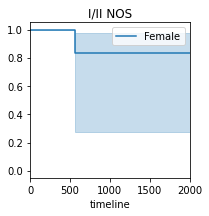

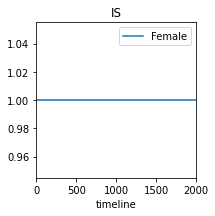

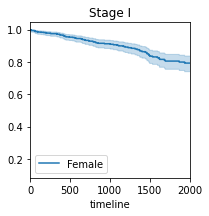

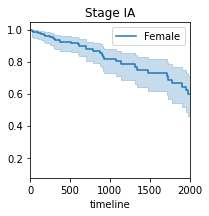

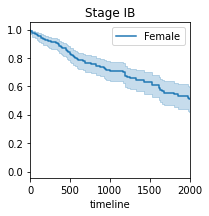

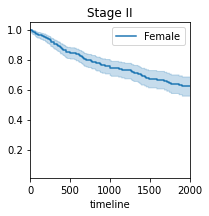

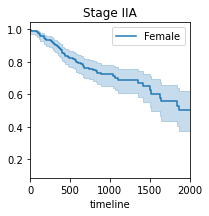

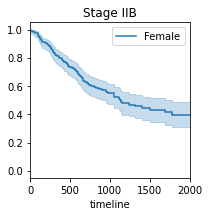

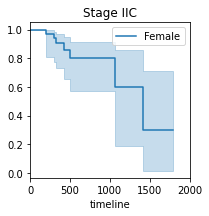

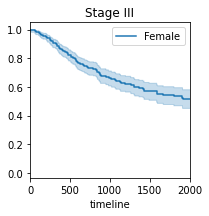

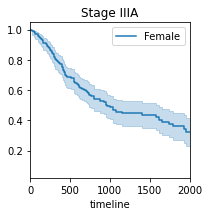

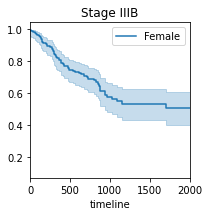

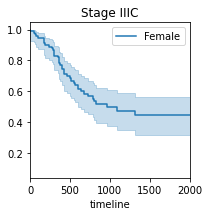

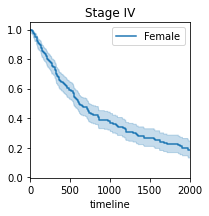

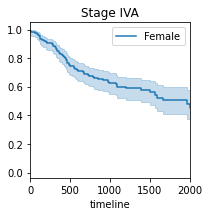

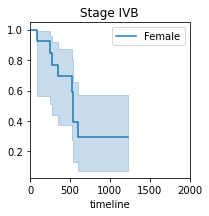

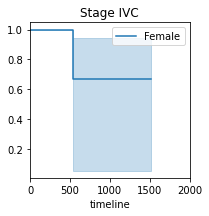

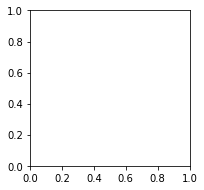

In [13]:
#Plot for gender == Male
stage = data.sort_values(by=['ajcc_pathologic_tumor_stage'])['ajcc_pathologic_tumor_stage'].unique()
stage  = list(stage)
for i in stage:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(6,6,stage.index(i) + 1)
    ix = data['ajcc_pathologic_tumor_stage'] == i 
    g = data['gender'] == 1
    kmf.fit(durations = T[ix][g],event_observed = E[ix][g],label = 'Female')
    kmf.plot_survival_function(ax = ax,legend = True)
    plt.title(i)
    plt.xlim(0,2000)
plt.tight_layout()
plt.show()

Event
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age_at_initial_pathologic_diagnosis, dtype: object

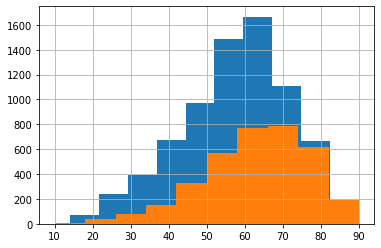

In [14]:
data.groupby('Event').age_at_initial_pathologic_diagnosis.hist()

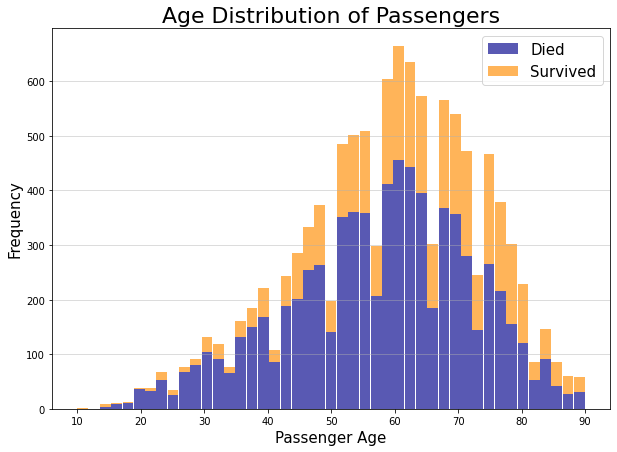

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = data[data['Event']==0]['age_at_initial_pathologic_diagnosis']
age_survive = data[data['Event']==1]['age_at_initial_pathologic_diagnosis']
n, bins, patches = plt.hist(x = [age_died, age_survive], 
                            stacked = True, bins='auto', 
                            color=['darkblue', 'darkorange'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Passenger Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Passengers', fontsize = 22)
plt.legend(['Died','Survived'], fontsize = 15);

In [16]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,3,3
533.0,1,1,0,0,3
715.0,1,0,1,0,2
1514.0,1,0,1,0,1


In [17]:
kmf.survival_function_

,Female
timeline,
0.0,1.000000
533.0,0.666667
715.0,0.666667
1514.0,0.666667


In [18]:
kmf.fit(durations = data['Delay'],event_observed=data['Event'],label = 'kmf')

<lifelines.KaplanMeierFitter:"kmf", fitted with 11018 total observations, 7477 right-censored observations>

In [19]:
kmf.cumulative_density_

,kmf
timeline,
0.0,0.001724
1.0,0.001816
2.0,0.002182
3.0,0.002457
4.0,0.002549
...,...
9634.0,0.859522
10346.0,0.894641
10870.0,0.929761


<AxesSubplot:xlabel='timeline'>

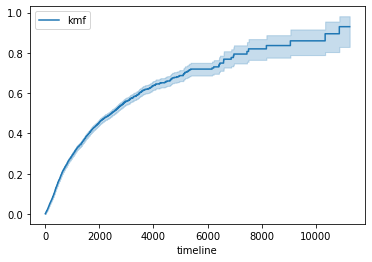

In [20]:
kmf.plot_cumulative_density() #Number of survival days increases the Death rate increases

In [21]:
#Survival probability based on gender
kmma = KaplanMeierFitter()
kmfe = KaplanMeierFitter()

Male = data.query('gender == 1')
Female = data.query('gender == 0')

In [22]:
kmma.fit(durations = Male['Delay'],event_observed = Male['Event'],label = 'Male')
kmfe.fit(durations = Female['Delay'],event_observed = Female['Event'],label = 'Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 5770 total observations, 4006 right-censored observations>

In [23]:
kmma.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,41,10,31,5248,5248
1.0,2,1,1,0,5207
2.0,3,3,0,0,5205
3.0,13,2,11,0,5202
4.0,3,0,3,0,5189
...,...,...,...,...,...
7437.0,1,0,1,0,5
7514.0,1,1,0,0,4
9061.0,1,1,0,0,3


In [24]:
kmfe.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,66,9,57,5770,5770
1.0,4,0,4,0,5704
2.0,6,1,5,0,5700
3.0,5,1,4,0,5694
4.0,9,1,8,0,5689
...,...,...,...,...,...
8605.0,1,0,1,0,5
9188.0,1,0,1,0,4
10346.0,1,1,0,0,3


In [25]:
kmma.predict(10000)*100

9.08021170842849

In [26]:
kmfe.predict(10000)*100

18.65200760892045

Text(0.5, 1.0, 'Male and Female')

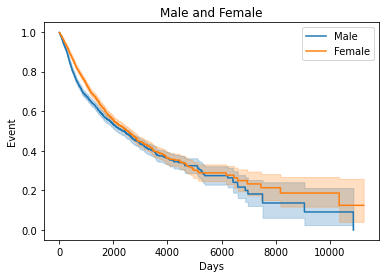

In [27]:
kmma.plot()
kmfe.plot()
plt.xlabel('Days')
plt.ylabel('Event')
plt.title('Male and Female')
#The probability of Females survival is greater than Males

In [28]:
data.loc[data.vital_status == 'Alive','Event'] =0
data.loc[data.vital_status == 'Dead','Event'] = 1
data

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,1,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0
11090,TCGA_EE_A2GD,SKCM,58.0,0,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0
11091,TCGA_FS_A1ZC,SKCM,51.0,1,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0
11092,TCGA_LH_A9QB,SKCM,24.0,0,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0


In [29]:
df = data[['age_at_initial_pathologic_diagnosis','gender','Delay','Event']]
df

,age_at_initial_pathologic_diagnosis,gender,Delay,Event
0,85.0,1,0.0,0.0
1,66.0,0,0.0,0.0
2,80.0,0,0.0,0.0
3,67.0,0,0.0,0.0
4,66.0,0,0.0,0.0
...,...,...,...,...
11089,20.0,1,9634.0,0.0
11090,58.0,0,10346.0,1.0
11091,51.0,1,10870.0,1.0
11092,24.0,0,11217.0,0.0


In [30]:
cox = CoxPHFitter()
cox.fit(df,'Delay',event_col='Event')
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 11018 total observations, 7477 right-censored observations>
             duration col = 'Delay'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 11018
number of events observed = 3541
   partial log-likelihood = -29837.68
         time fit was run = 2022-08-05 06:48:27 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
age_at_initial_pathologic_diagnosis   0.03       1.03       0.00             0.02             0.03                 1.02                 1.03
gender                                0.17       1.18       0.03             0.10             0.24                 1.11                 1.27

                                      cmp to     z      p   -log2(p)
covariate                                                           
age_at_initial_pathologic_diagnosis     0.00 21.13 <0.005     326.90
gender                                  0.00  5.03 <0.005      20.96
---
Concordance = 0.62
Partial AIC = 59679.36
log-likelihood ratio test = 503.11 on 2 df
-log2(p) of ll-ratio test = 362.92

<AxesSubplot:xlabel='log(HR) (95% CI)'>

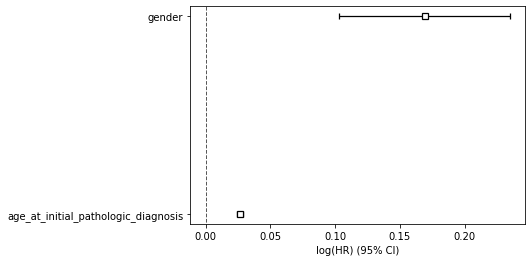

In [31]:
cox.plot()

In [32]:
#Age groups


bins = [5, 10,15, 20,25,30,35,40,45, 50,55, 60,65, 70,75,80,85,90]
labels = ['5-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75'
         ,'76-80','81-85','86-90']
data['agerange'] = pd.cut(data.age_at_initial_pathologic_diagnosis, bins, labels = labels,include_lowest = True)


In [33]:
data['agerange'].value_counts()

61-65    1537
56-60    1500
66-70    1407
51-55    1235
71-75    1183
46-50     903
76-80     799
41-45     636
36-40     488
81-85     392
31-35     340
26-30     233
86-90     153
21-25     140
16-20      63
11-15       8
5-10        1
Name: agerange, dtype: int64

In [34]:
data

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,1,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0,16-20
11090,TCGA_EE_A2GD,SKCM,58.0,0,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0,56-60
11091,TCGA_FS_A1ZC,SKCM,51.0,1,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0,51-55
11092,TCGA_LH_A9QB,SKCM,24.0,0,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0,21-25


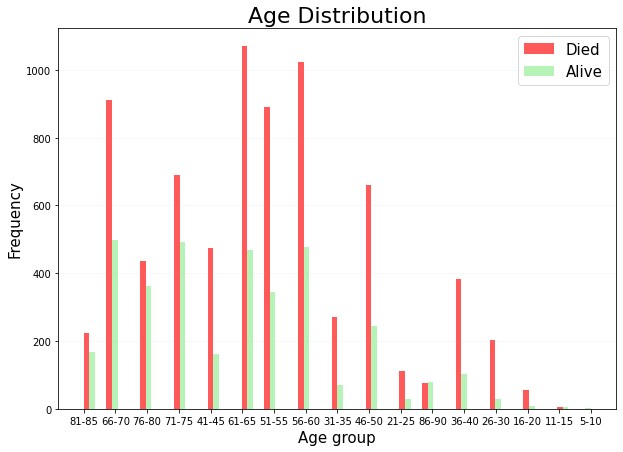

In [35]:
#Death and alive status for age groups
fig, ax = plt.subplots(figsize=(10,7))
age_survive = data[data['Event']==0]['agerange']
age_died = data[data['Event']==1]['agerange']
n, bins, patches = plt.hist(x = [age_survive,age_died] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);

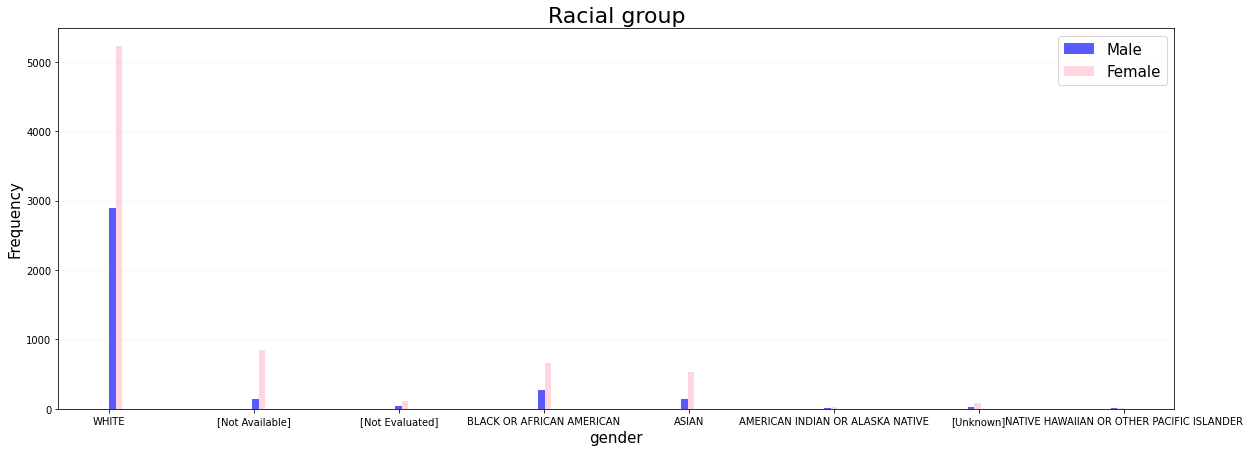

In [36]:
#Plotting race based on gender
fig, ax = plt.subplots(figsize=(20,7))
race_Male = data[data['Event']==1]['race']
race_Female = data[data['Event']==0]['race']
n, bins, patches = plt.hist(x = [race_Male,race_Female] 
                            , bins='auto', 
                            color=['blue','pink'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('gender', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Racial group', fontsize = 22)
plt.legend(['Male','Female'], fontsize = 15);

In [37]:
data

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,1,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0,16-20
11090,TCGA_EE_A2GD,SKCM,58.0,0,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0,56-60
11091,TCGA_FS_A1ZC,SKCM,51.0,1,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0,51-55
11092,TCGA_LH_A9QB,SKCM,24.0,0,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0,21-25


In [38]:
x=data.groupby(['race','gender','Event'])['gender'].count()
y=data.groupby(['race'])['gender'].count()
r=((x/y)*100).round(2)
print(r)


race                                       gender  Event
AMERICAN INDIAN OR ALASKA NATIVE           0       0.0      48.15
                                                   1.0      22.22
                                           1       0.0      25.93
                                                   1.0       3.70
ASIAN                                      0       0.0      39.10
                                                   1.0       6.87
                                           1       0.0      39.85
                                                   1.0      14.18
BLACK OR AFRICAN AMERICAN                  0       0.0      49.51
                                                   1.0      17.04
                                           1       0.0      21.36
                                                   1.0      12.08
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  0       0.0      61.54
                                                   1.0      30.77
                   

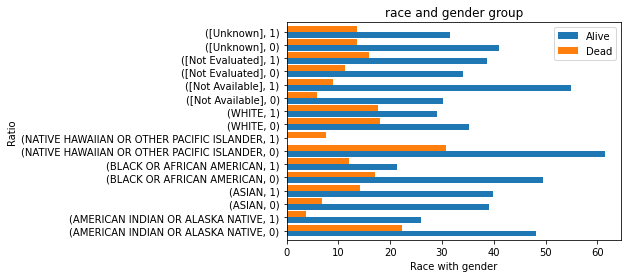

<Figure size 3600x7200 with 0 Axes>

In [39]:
#Ratio of death based on gender and race

r.unstack().plot(kind = 'barh',width = 0.9)
plt.ylabel('Ratio')
plt.title('race and gender group')
plt.xlabel('Race with gender')
plt.legend(['Alive','Dead'])
plt.figure(figsize=(50, 100))
plt.savefig('race and gender.jpg',format = 'jpg')
plt.show()

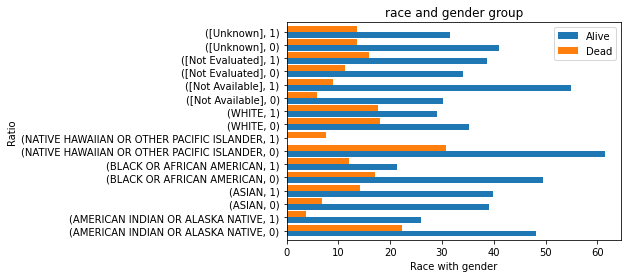

<Figure size 3600x7200 with 0 Axes>

In [40]:
r.unstack().plot(kind = 'barh',width = 0.9)
plt.ylabel('Ratio')
plt.title('race and gender group')
plt.xlabel('Race with gender')
plt.legend(['Alive','Dead'])
plt.figure(figsize=(50, 100))
plt.savefig('race and gender.jpg',format = 'jpg')
plt.show()

In [41]:
a=data.groupby(['type','gender','Event'])['gender'].count()
b=data.groupby(['type'])['gender'].count()
z=((a/b)*100).round(2)
print(z)


type  gender  Event
ACC   0       0.0      40.22
              1.0      25.00
      1       0.0      22.83
              1.0      11.96
BLCA  0       0.0      13.87
                       ...  
UCS   0       1.0      61.40
UVM   0       0.0      33.75
              1.0      10.00
      1       0.0      37.50
              1.0      18.75
Name: gender, Length: 120, dtype: float64


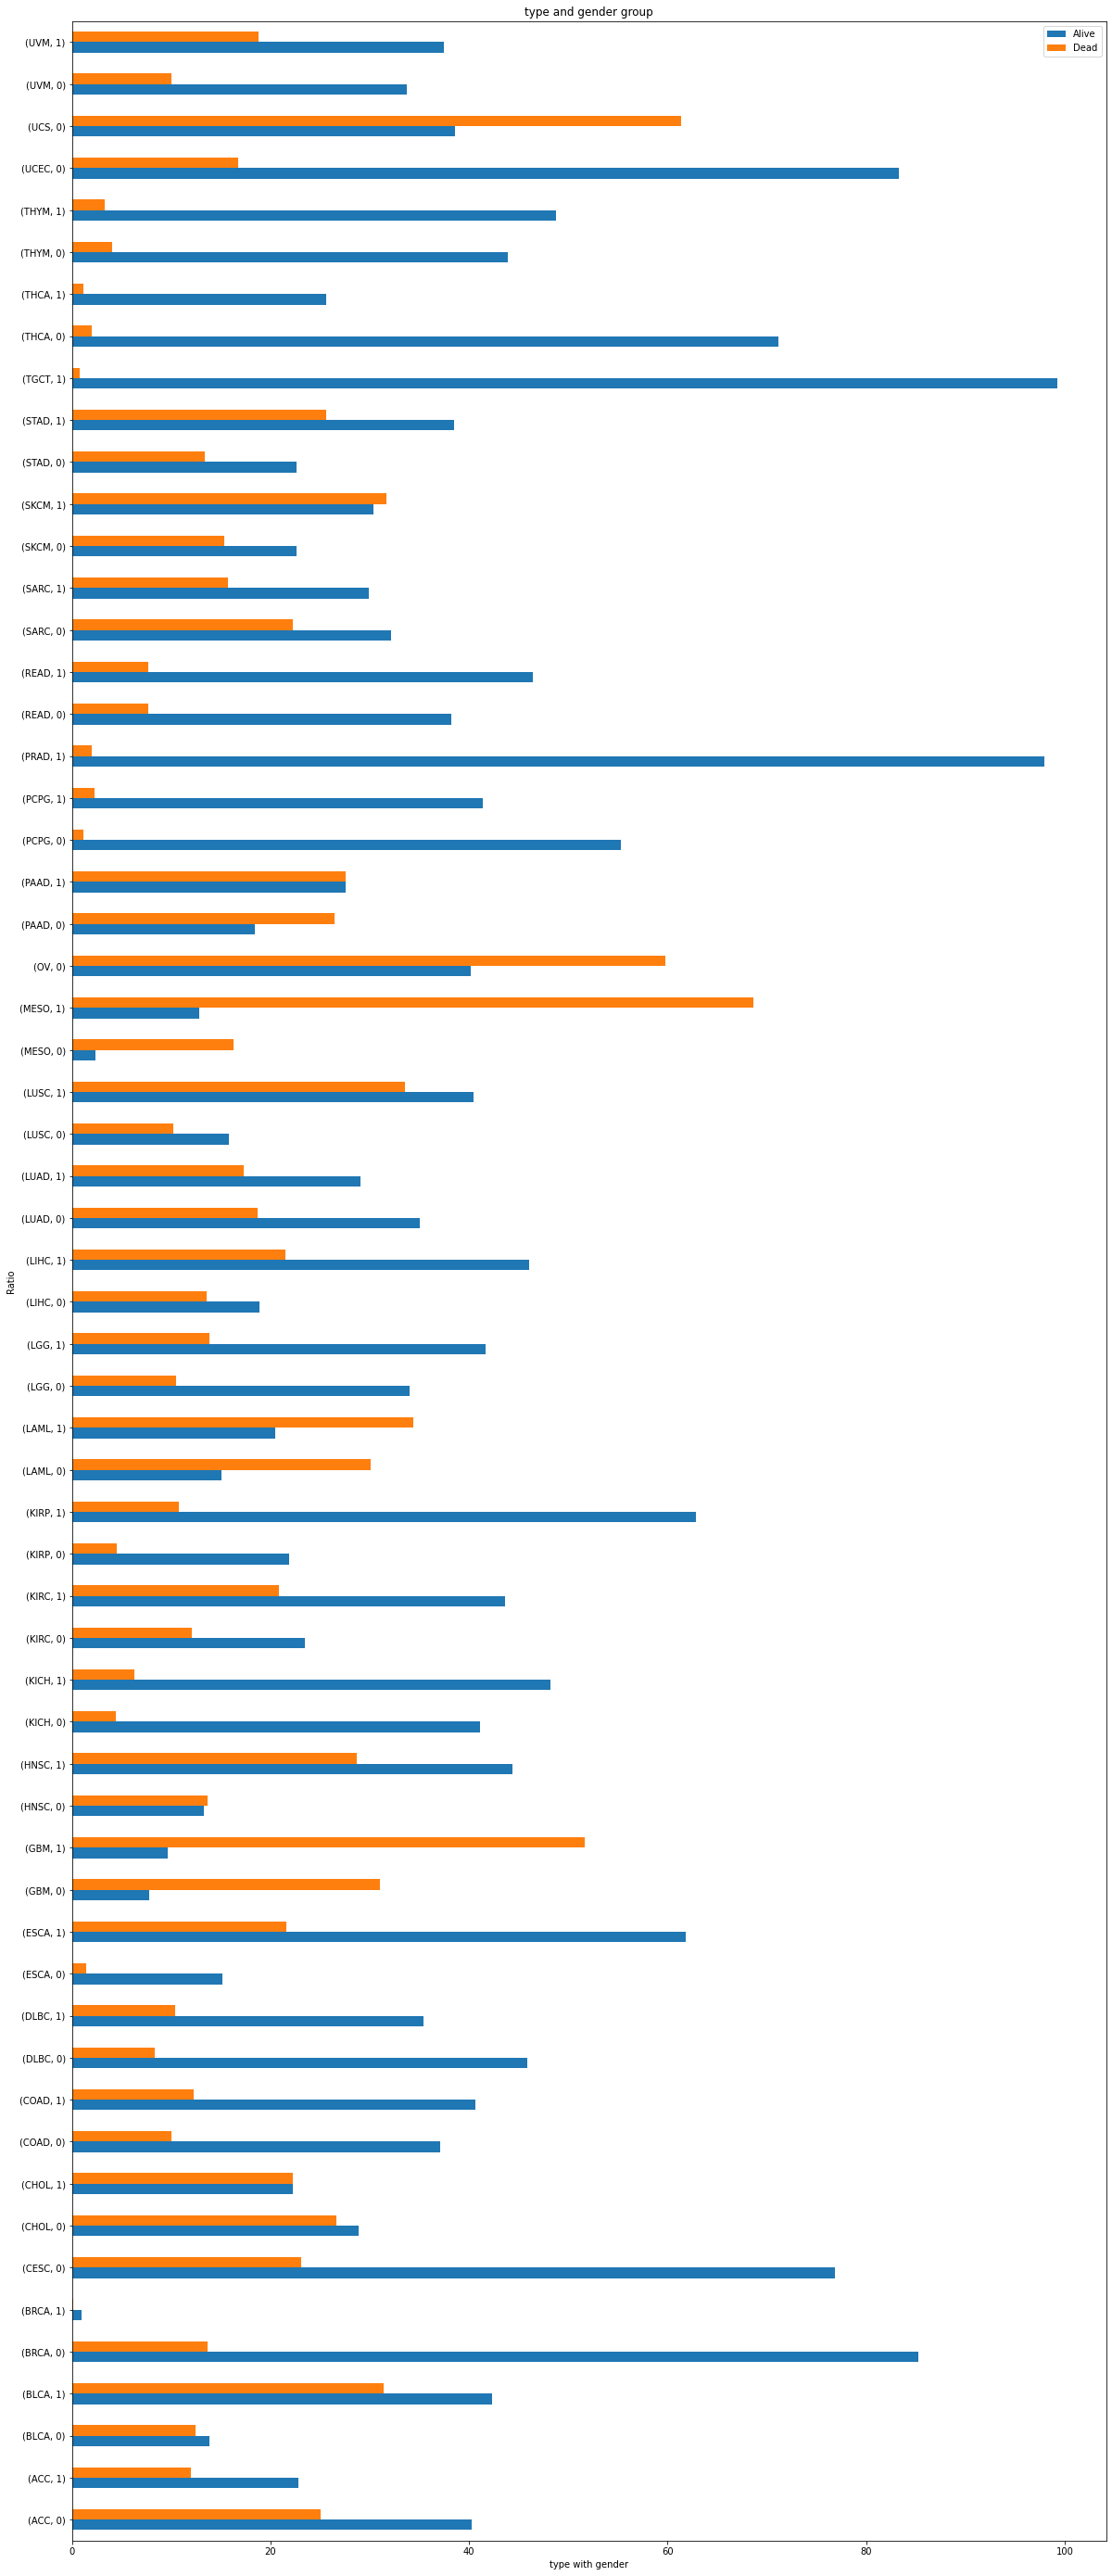

In [42]:
plt.rcParams["figure.figsize"] = (20,50)
z.unstack().plot(kind = 'barh')
plt.ylabel('Ratio')
plt.title('type and gender group')
plt.xlabel('type with gender')
plt.legend(['Alive','Dead'])
plt.plot()
plt.show()

In [43]:
data

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,1,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0,16-20
11090,TCGA_EE_A2GD,SKCM,58.0,0,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0,56-60
11091,TCGA_FS_A1ZC,SKCM,51.0,1,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0,51-55
11092,TCGA_LH_A9QB,SKCM,24.0,0,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0,21-25


In [44]:
data.value_counts(['race','gender'])

race                                       gender
WHITE                                      0         4322
                                           1         3795
[Not Available]                            1          637
BLACK OR AFRICAN AMERICAN                  0          617
ASIAN                                      1          362
[Not Available]                            0          360
BLACK OR AFRICAN AMERICAN                  1          310
ASIAN                                      0          308
[Not Evaluated]                            1           82
                                           0           68
[Unknown]                                  0           64
                                           1           53
AMERICAN INDIAN OR ALASKA NATIVE           0           19
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  0           12
AMERICAN INDIAN OR ALASKA NATIVE           1            8
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  1            1
dtype: int64

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          27.48 <0.005     22.58

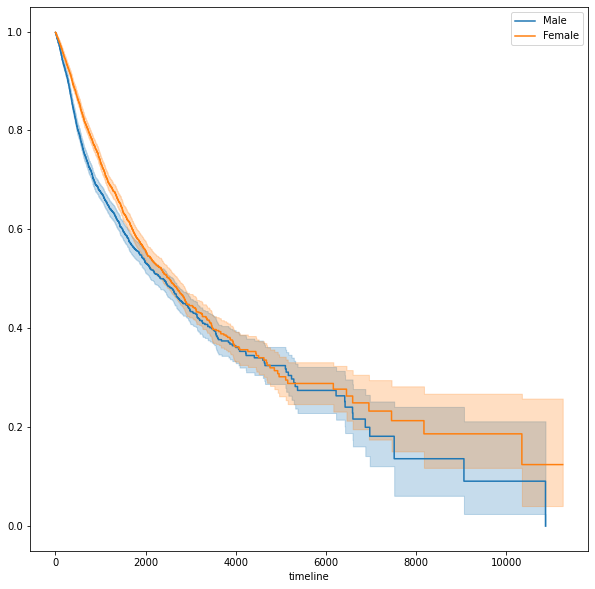

In [69]:
from lifelines import KaplanMeierFitter
group1=data[data['gender']==1]
group2=data[data['gender']==0]
T=group1['Delay']
E=group1['Event']
T1=group2['Delay']
E1=group2['Event']

kmf = KaplanMeierFitter()

ax = plt.subplot(111)
ax = kmf.fit(T, E, label="Male").plot(ax=ax)
ax = kmf.fit(T1, E1, label="Female").plot(ax=ax)

#logrank_test
from lifelines.statistics import logrank_test
results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()

In [46]:
data.value_counts(['type','gender'])

type  gender
BRCA  0         1084
OV    0          582
UCEC  0          545
PRAD  1          500
HNSC  1          385
THCA  0          371
LUSC  1          364
GBM   1          364
KIRC  1          346
CESC  0          307
BLCA  1          303
LGG   1          285
SKCM  1          282
STAD  1          278
LUAD  0          270
LIHC  1          254
COAD  1          242
LUAD  1          233
GBM   0          230
LGG   0          229
COAD  0          216
KIRP  1          212
KIRC  0          191
SKCM  0          173
STAD  0          156
SARC  0          142
HNSC  0          142
THCA  1          136
TGCT  1          129
LUSC  0          128
LIHC  0          122
SARC  1          119
ESCA  1          116
BLCA  0          108
LAML  1          102
PAAD  1          102
PCPG  0          101
READ  1           92
LAML  0           84
PAAD  0           83
READ  0           78
PCPG  1           78
KIRP  0           76
MESO  1           70
THYM  1           64
KICH  1           61
ACC   0           60


In [47]:
a=data.groupby(['ajcc_pathologic_tumor_stage','gender','Event'])['gender'].count()
b=data.groupby(['ajcc_pathologic_tumor_stage'])['gender'].count()
z=((a/b)*100).round(2)
print(z)


ajcc_pathologic_tumor_stage  gender  Event
I/II NOS                     0       0.0       30.00
                             1       0.0       20.00
                                     1.0       50.00
IS                           1       0.0      100.00
Stage I                      0       0.0       43.49
                                               ...  
[Not Available]              1       0.0       24.58
                                     1.0       24.09
[Unknown]                    0       0.0       20.00
                             1       0.0       60.00
                                     1.0       20.00
Name: gender, Length: 81, dtype: float64


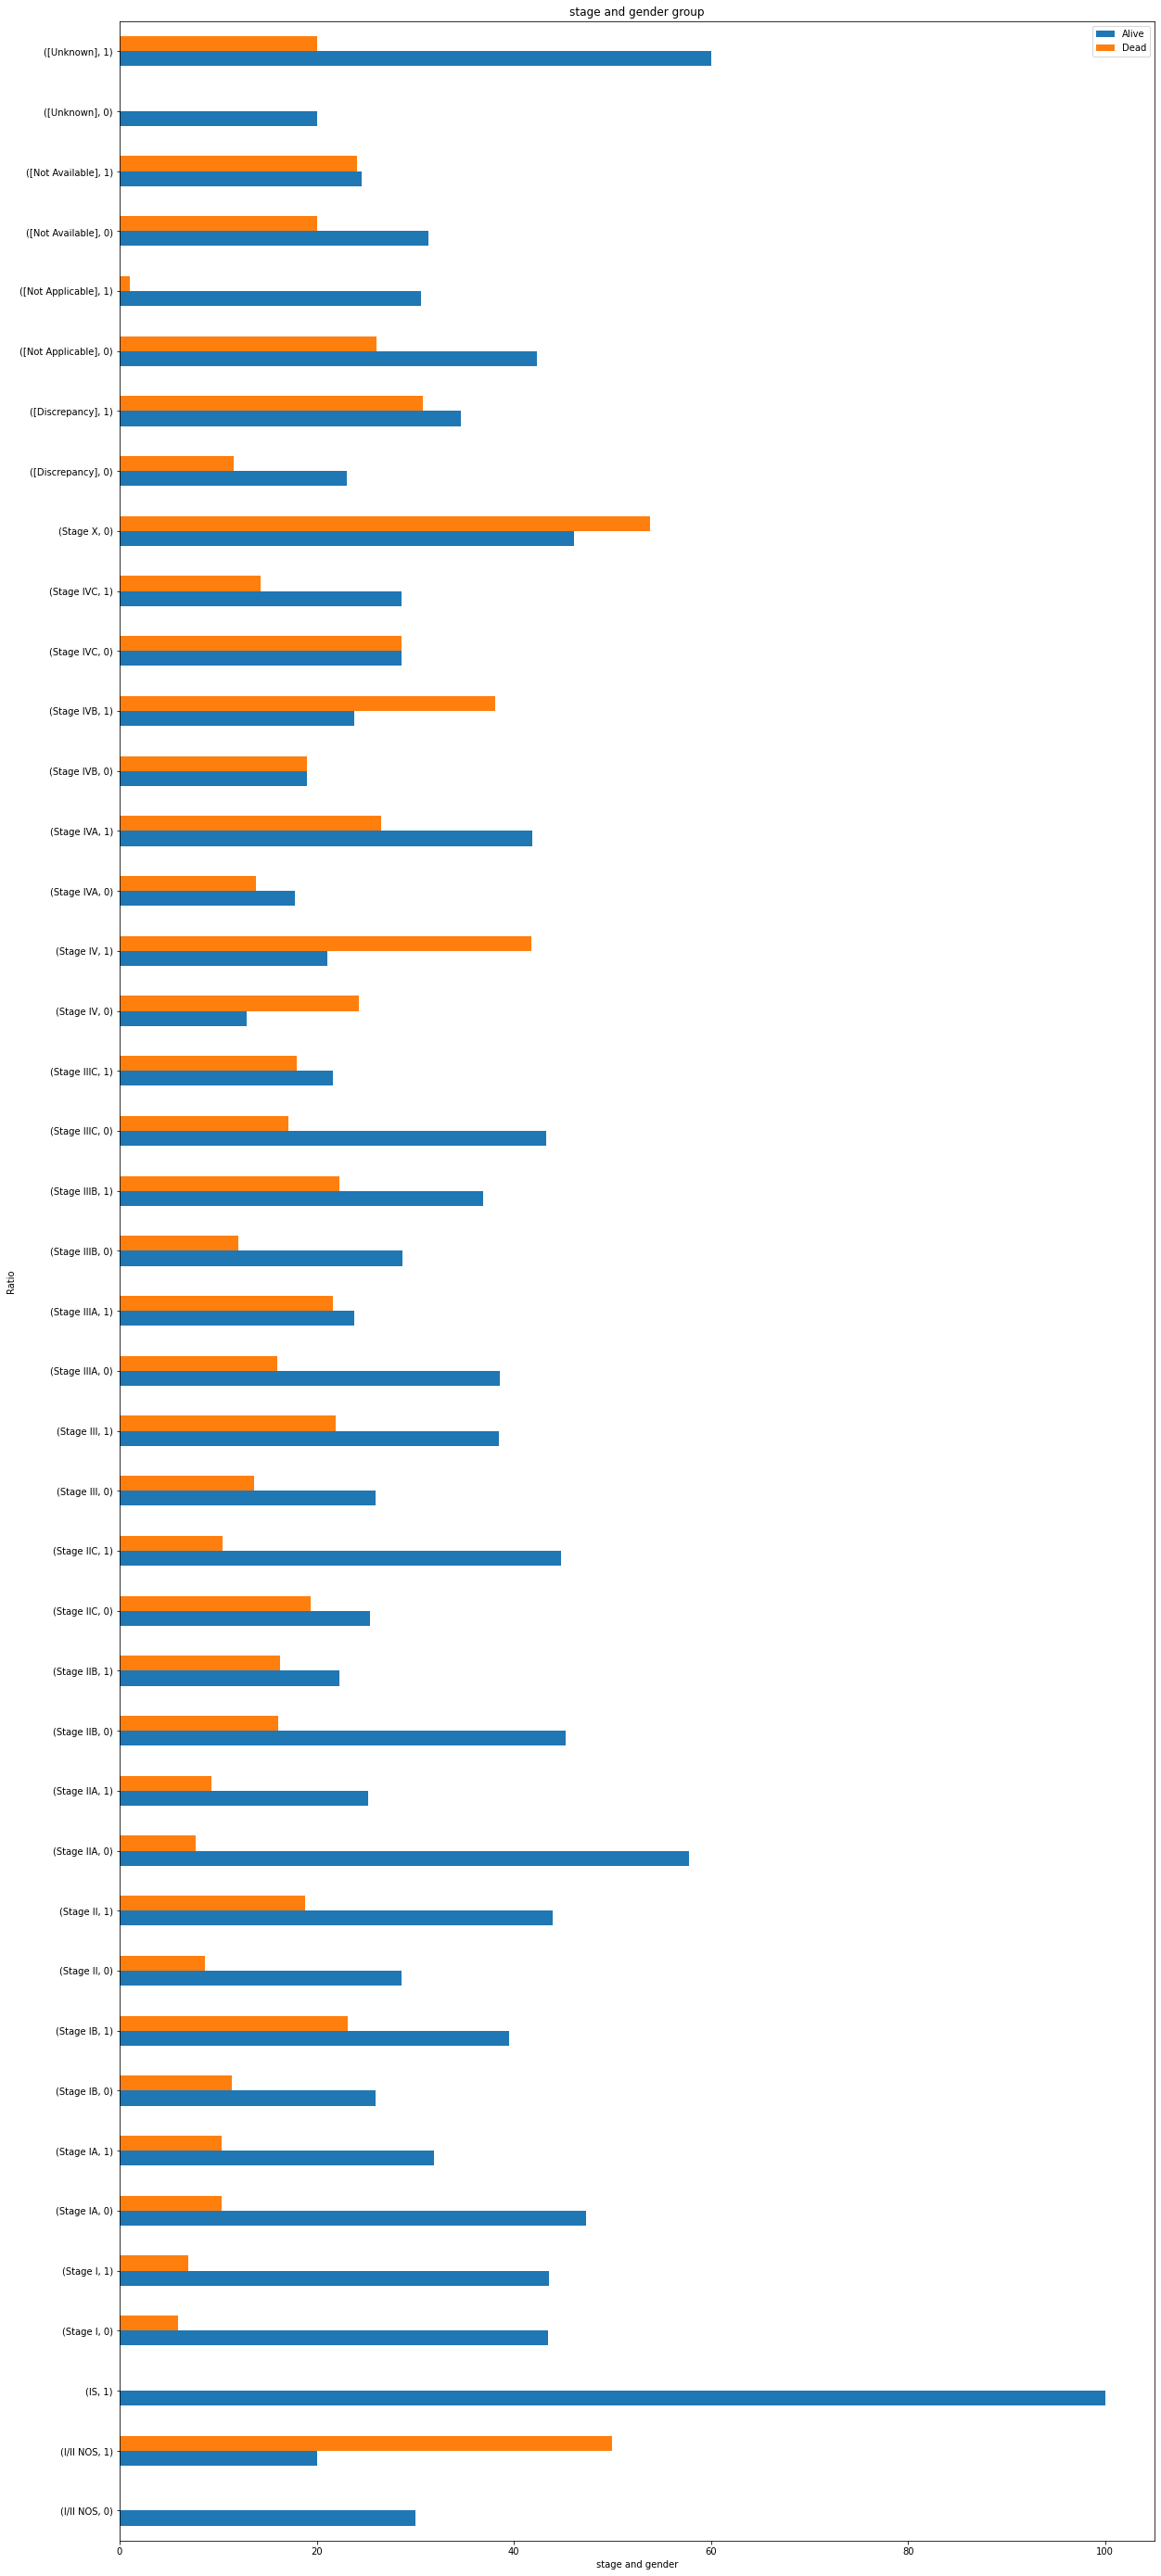

In [48]:
plt.rcParams["figure.figsize"] = (20,50)
z.unstack().plot(kind = 'barh')
plt.ylabel('Ratio')
plt.title('stage and gender group')
plt.xlabel('stage and gender')
plt.legend(['Alive','Dead'])
plt.plot()
plt.show()

In [49]:
z.drop(['[Not Available]','[Unknown]','[Not Applicable]'],inplace = True)

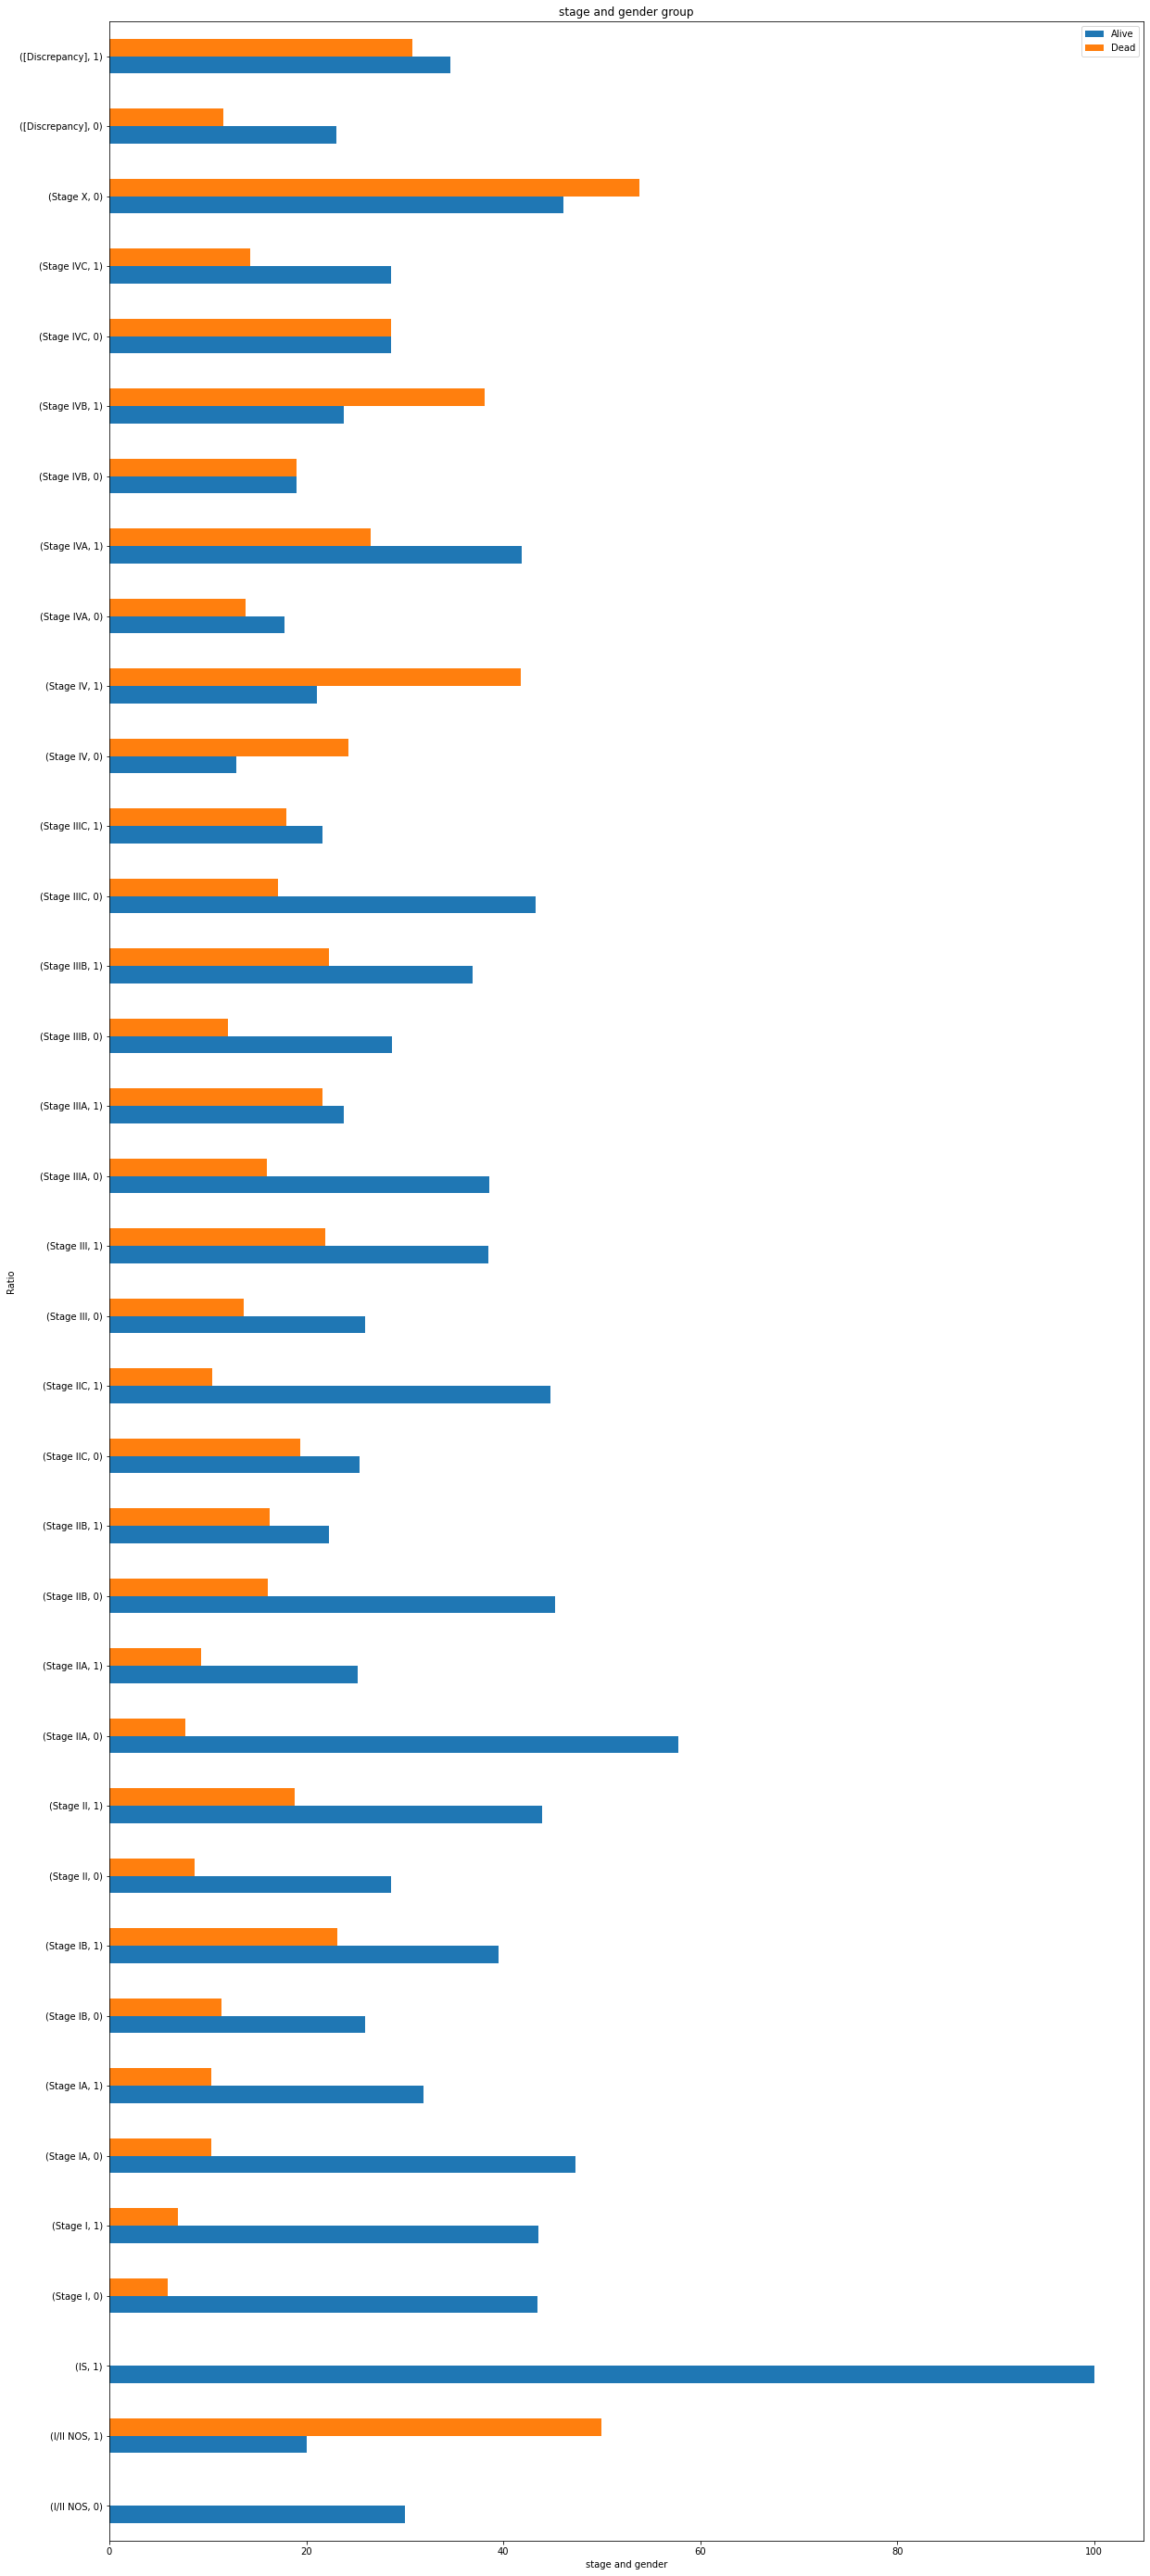

In [50]:
plt.rcParams["figure.figsize"] = (20,50)
z.unstack().plot(kind = 'barh')
plt.ylabel('Ratio')
plt.title('stage and gender group')
plt.xlabel('stage and gender')
plt.legend(['Alive','Dead'])
plt.plot()
plt.show()

In [ ]:
a1=data.groupby(['ajcc_pathologic_tumor_stage','agerange','Event'])['agerange'].count()
b1=data.groupby(['ajcc_pathologic_tumor_stage'])['agerange'].count()
z1=((a1/b1)*100).round(2)
print(z1)


In [ ]:
plt.rcParams["figure.figsize"] = (20,50)
z1.unstack().plot(kind = 'barh')
plt.ylabel('Ratio')
plt.title('stage and gender group')
plt.xlabel('stage and gender')
plt.legend(['Alive','Dead'])
plt.plot()
plt.show()

In [ ]:
a2=data.groupby(['type','agerange','Event'])['agerange'].count()
b2=data.groupby(['type'])['agerange'].count()
z2=((a2/b2)*100).round(2)
print(z2)


In [ ]:
plt.rcParams["figure.figsize"] = (20,500)
z2.unstack().plot(kind = 'barh')
plt.ylabel('Ratio')
plt.title('stage and gender group')
plt.xlabel('stage and gender')
plt.legend(['Alive','Dead'])
plt.plot()
plt.show()

In [ ]:
a3=data.groupby(['type','ajcc_pathologic_tumor_stage','Event'])['gender'].count()
b3=data.groupby(['type'])['gender'].count()
z3=((a3/b3)*100).round(2)
print(z3)


In [52]:
a4=data.groupby(['type','treatment_outcome_first_course','Event'])['Event'].count()
b4=data.groupby(['type'])['Event'].count()
z4=((a4/b4)*100).round(2)
print(z4)


type  treatment_outcome_first_course  Event
ACC   Complete Remission/Response     0.0      51.09
                                      1.0       7.61
      Partial Remission/Response      0.0       1.09
      Progressive Disease             0.0       5.43
                                      1.0      18.48
                                               ...  
UCS   [Not Available]                 1.0       8.77
      [Unknown]                       0.0       1.75
                                      1.0       3.51
UVM   [Not Available]                 0.0      71.25
                                      1.0      28.75
Name: Event, Length: 312, dtype: float64


In [53]:

z4.drop(labels='[Not Available]',level = 1,inplace= True)

z4.drop(labels='[Unknown]',level = 1,inplace= True)

z4.drop(labels='[Not Applicable]',level = 1,inplace= True)
z4

type  treatment_outcome_first_course  Event
ACC   Complete Remission/Response     0.0      51.09
                                      1.0       7.61
      Partial Remission/Response      0.0       1.09
      Progressive Disease             0.0       5.43
                                      1.0      18.48
                                               ...  
UCS   Partial Remission/Response      0.0       1.75
                                      1.0       5.26
      Progressive Disease             0.0       1.75
                                      1.0      21.05
      Stable Disease                  1.0       1.75
Name: Event, Length: 189, dtype: float64

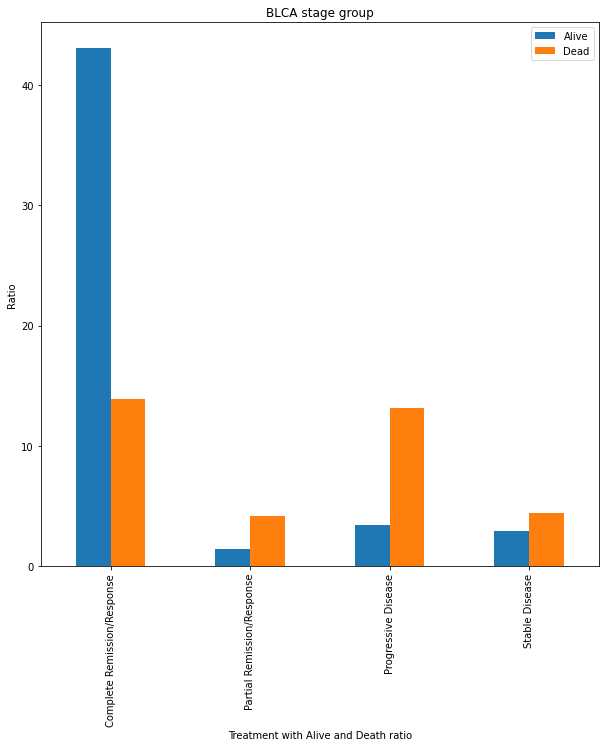

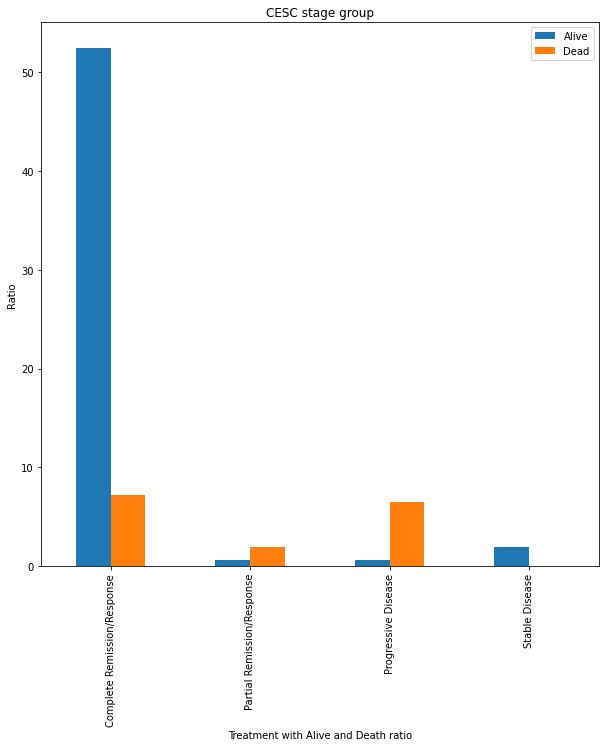

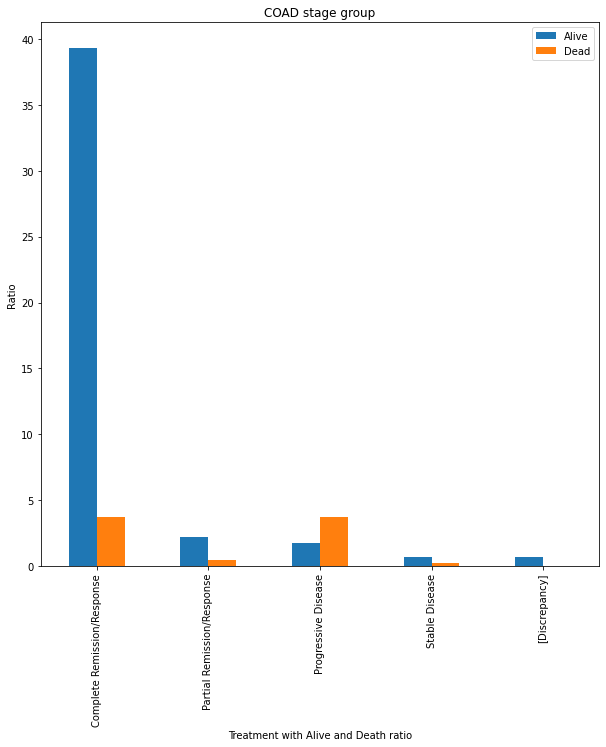

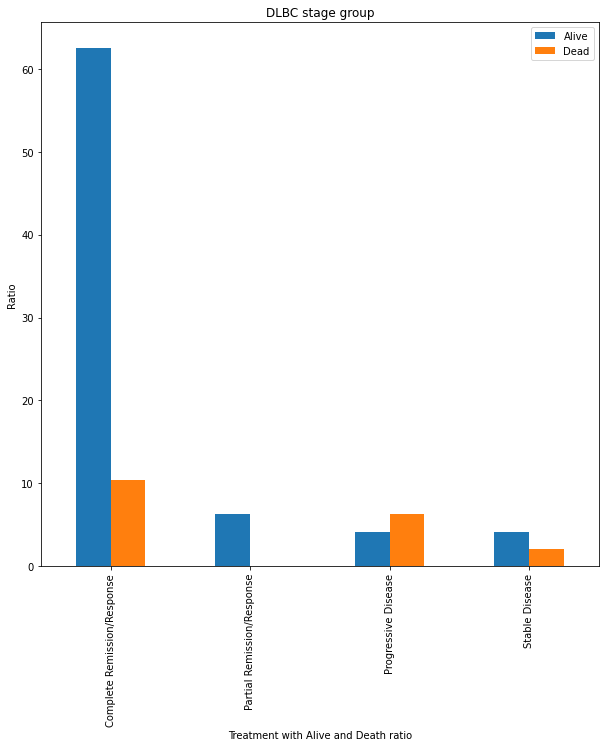

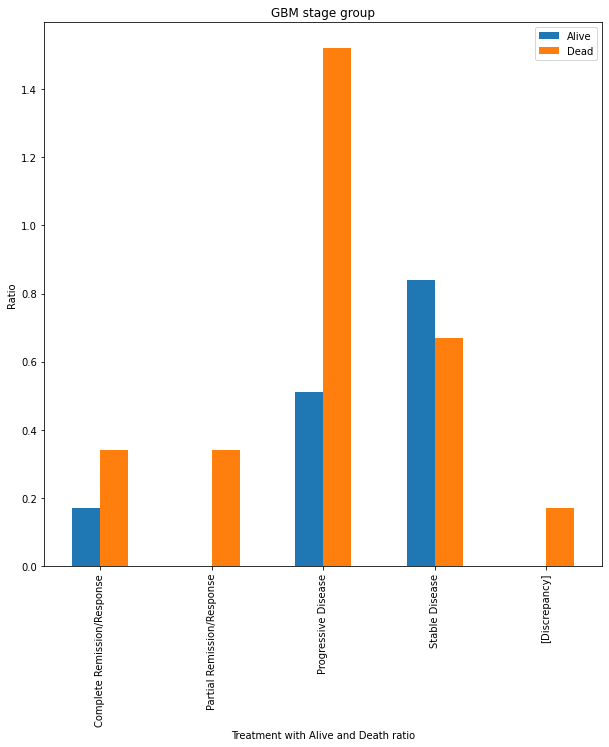

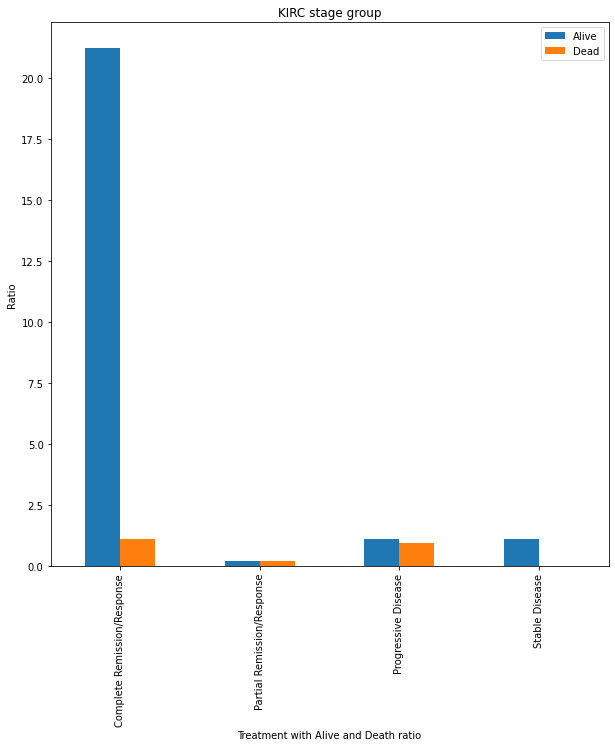

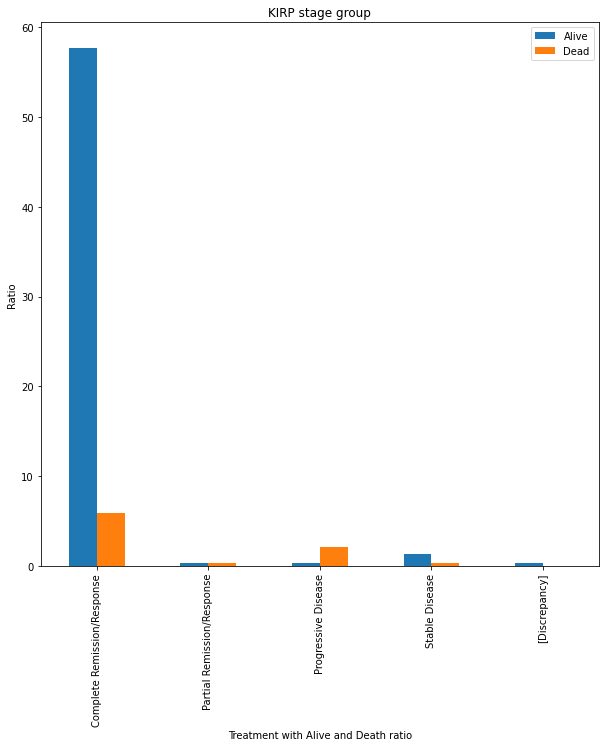

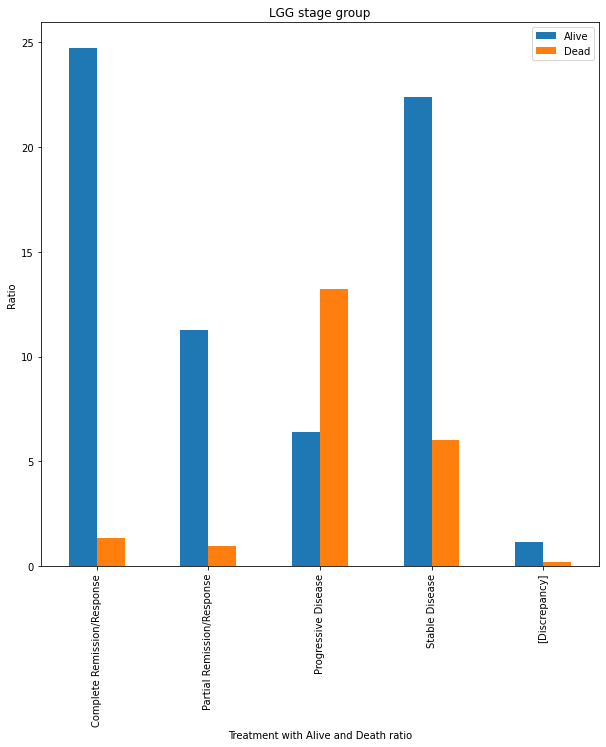

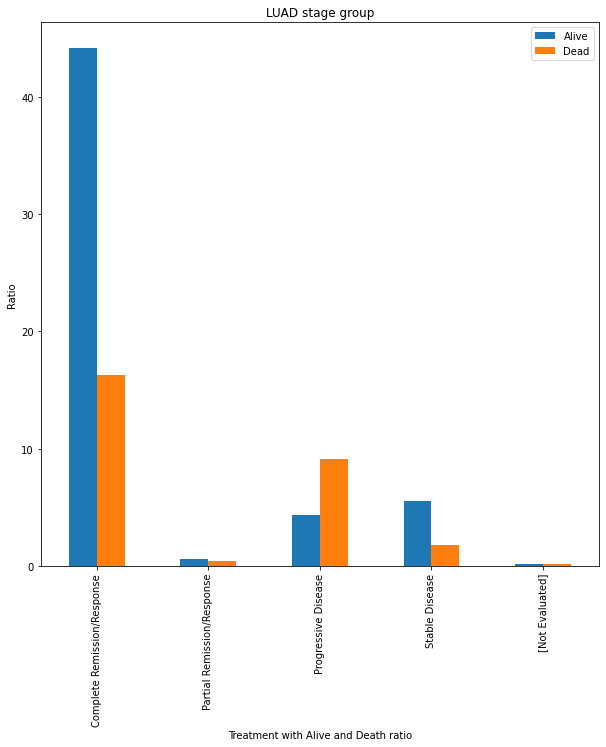

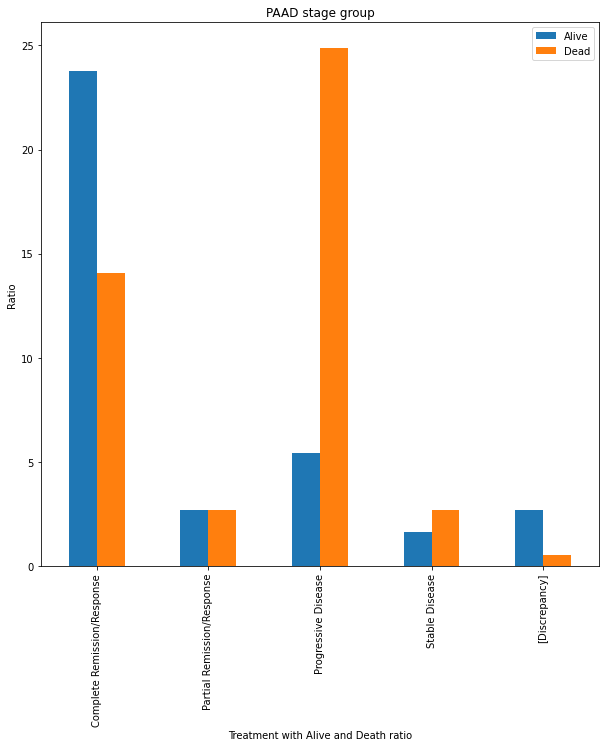

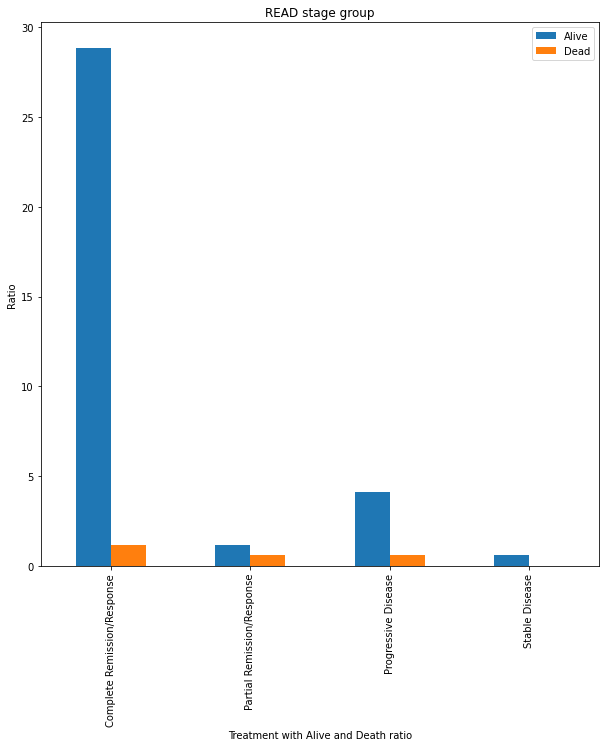

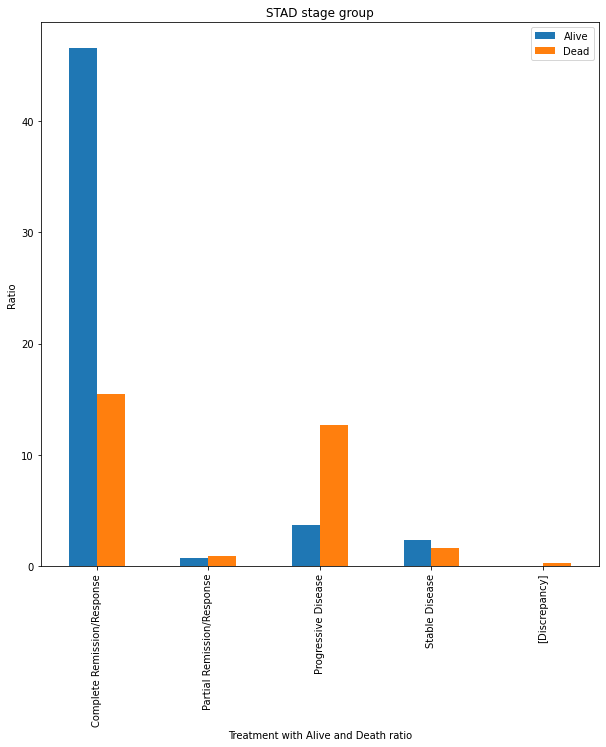

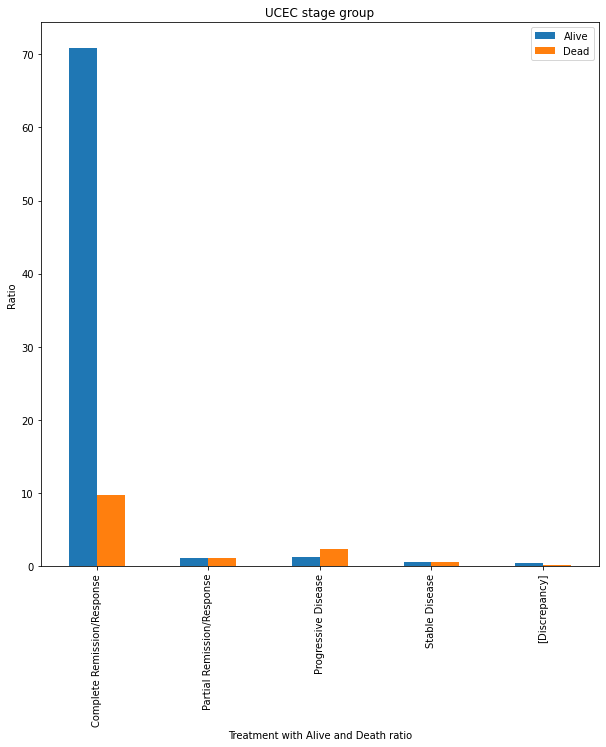

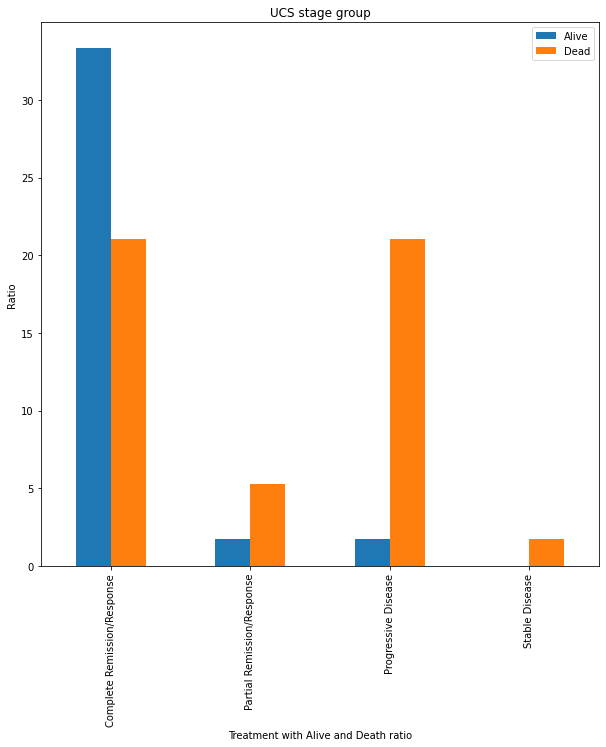

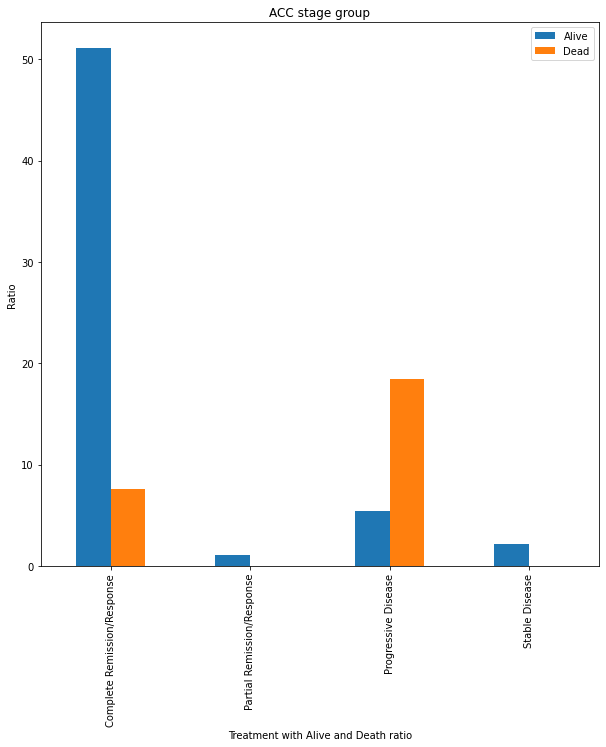

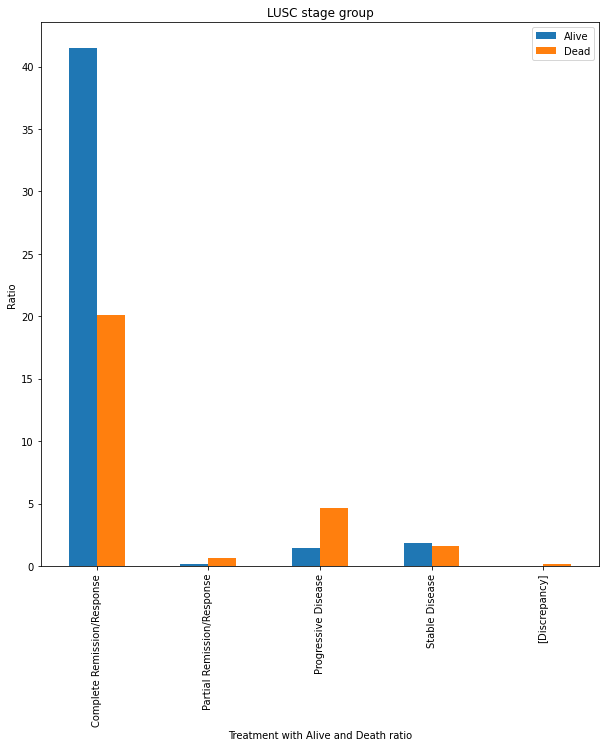

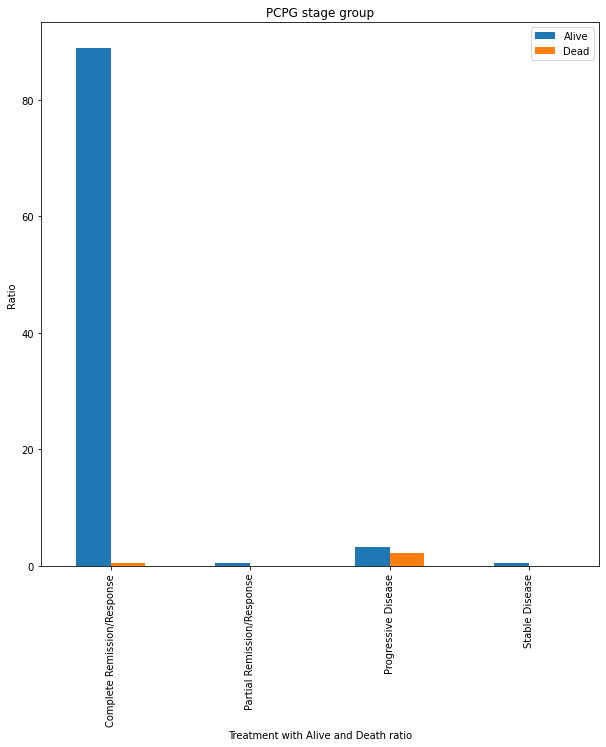

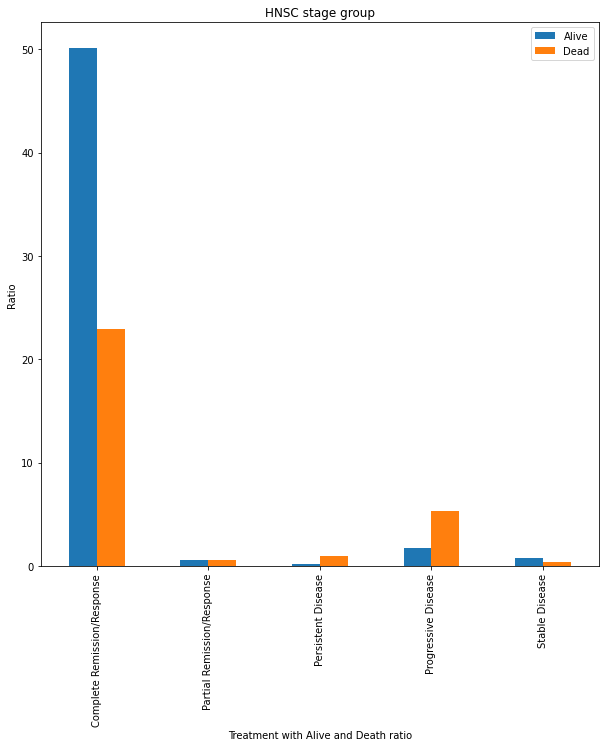

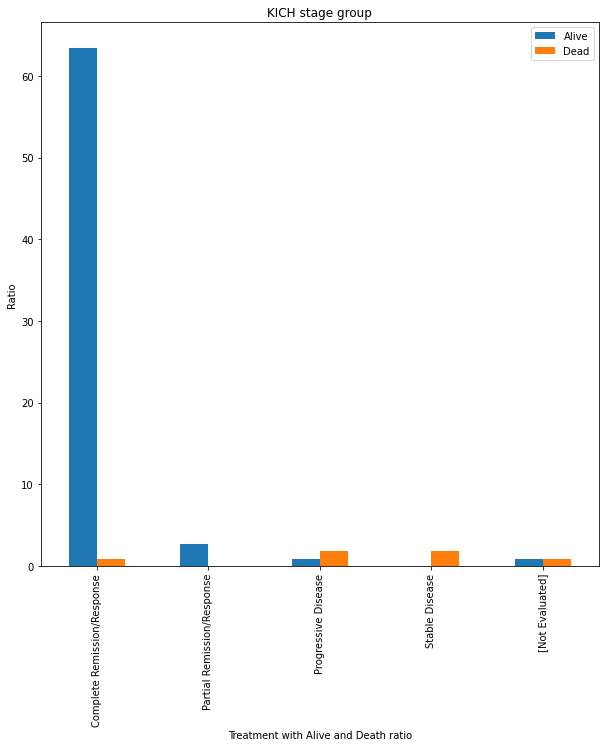

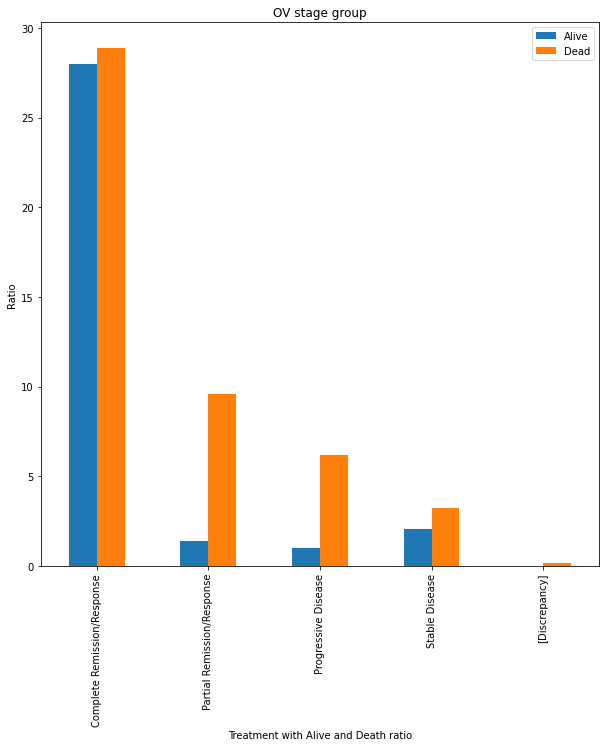

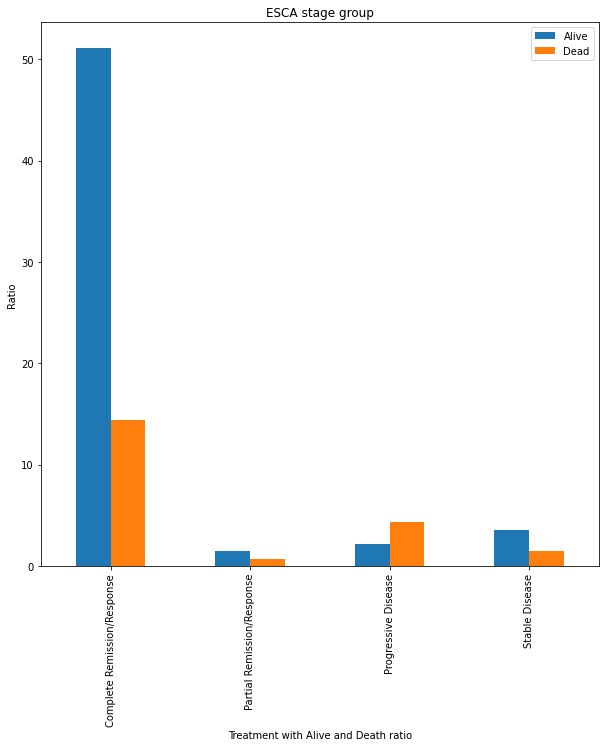

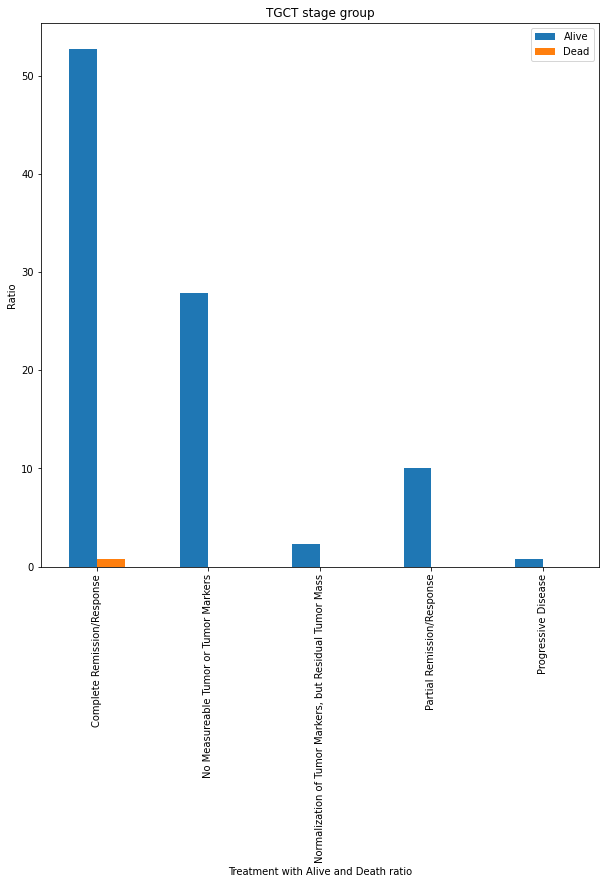

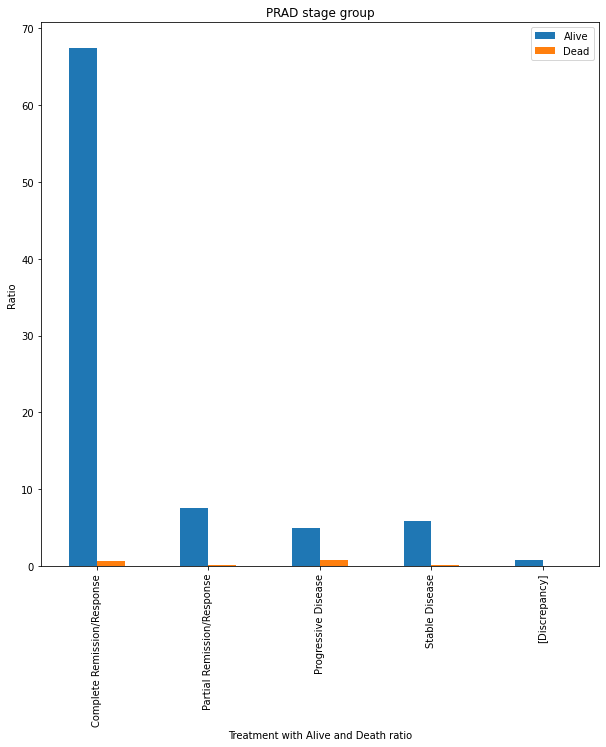

In [68]:
can = data['type'].unique()
for i in can:
    plt.rcParams["figure.figsize"] = (10,10)
    try:
        z4[i].unstack().plot(kind = 'bar') 
        plt.ylabel('Ratio')
        plt.title(i + ' stage group')
        plt.xlabel('Treatment with Alive and Death ratio')
        plt.legend(['Alive','Dead'])
        plt.plot()
        plt.savefig("test.png", format="png", dpi=300, bbox_inches='tight') 
        plt.show()
        
    except:
        continue


In [84]:
can = data['type'].unique()
for i in can:
    plt.rcParams["figure.figsize"] = (10,10)
    try:
        z[i].unstack().plot(kind = 'bar') 
        plt.ylabel('Ratio')
        plt.title(i + ' stage group')
        plt.xlabel('Treatment with Alive and Death ratio')
        plt.legend(['Alive','Dead'])
        plt.plot()
        plt.savefig("test.png", format="png", dpi=300, bbox_inches='tight') 
        plt.show()
    except:
        continue

In [85]:
a4=data.groupby(['type','ajcc_pathologic_tumor_stage','Event'])['Event'].count()
b4=data.groupby(['type'])['Event'].count()
z4=((a4/b4)*100).round(2)
print(z4)


type  ajcc_pathologic_tumor_stage  Event
ACC   Stage I                      0.0       8.70
                                   1.0       1.09
      Stage II                     0.0      39.13
                                   1.0       8.70
      Stage III                    0.0      10.87
                                            ...  
UVM   Stage IIIB                   1.0       3.75
      Stage IIIC                   0.0       1.25
      Stage IV                     0.0       1.25
                                   1.0       3.75
      [Not Available]              1.0       1.25
Name: Event, Length: 371, dtype: float64


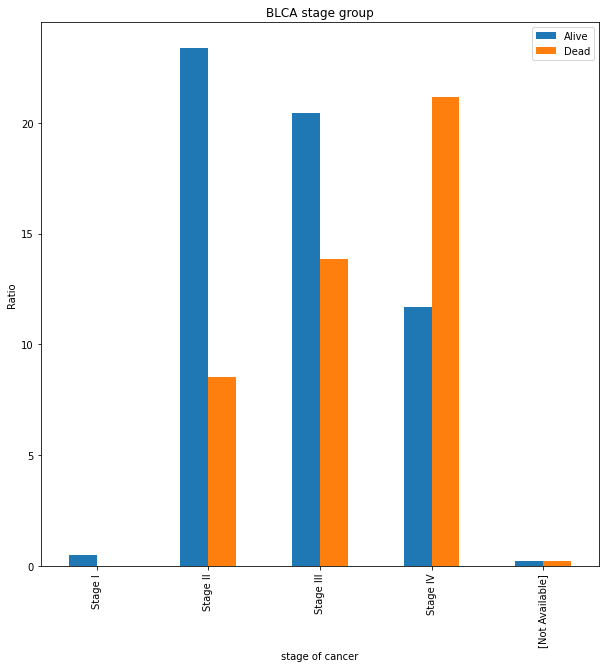

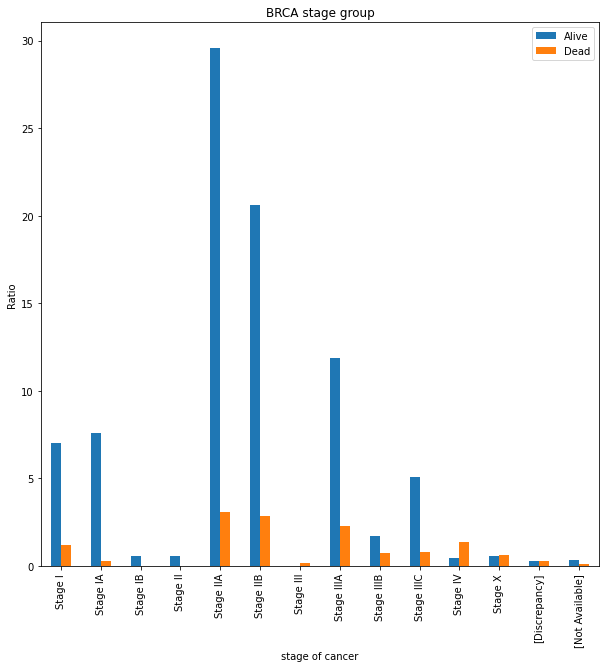

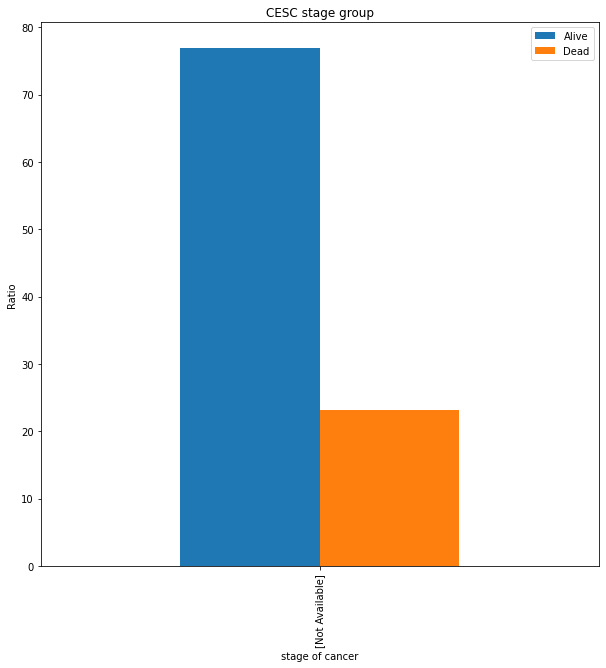

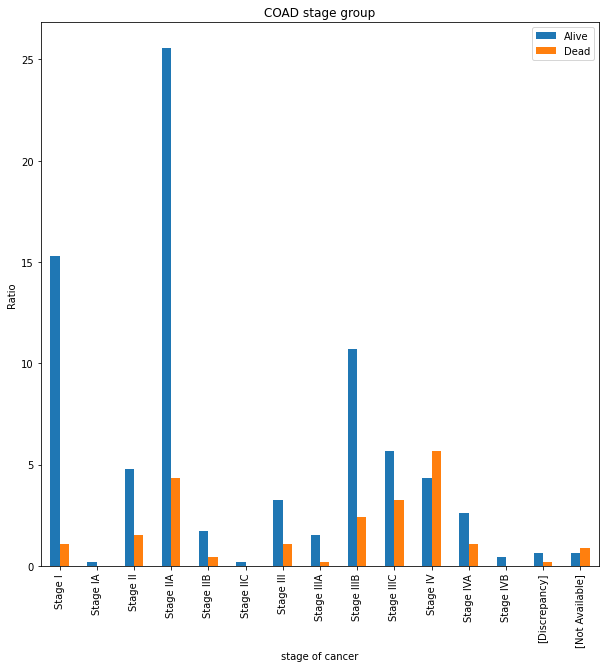

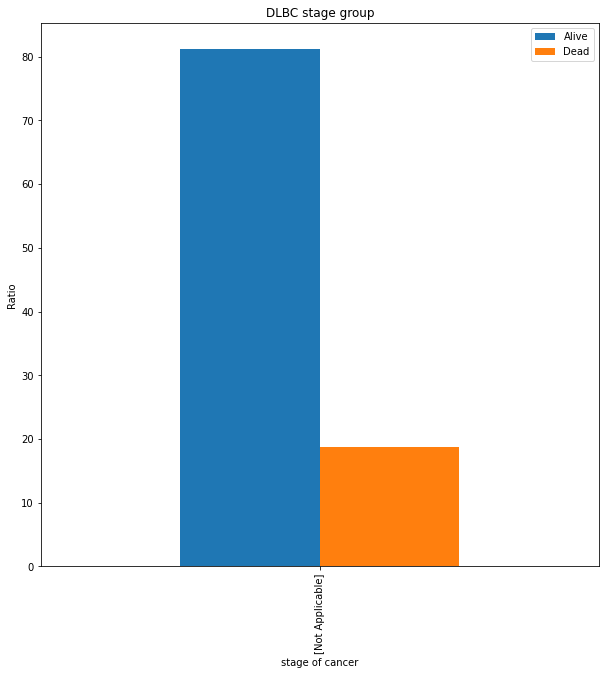

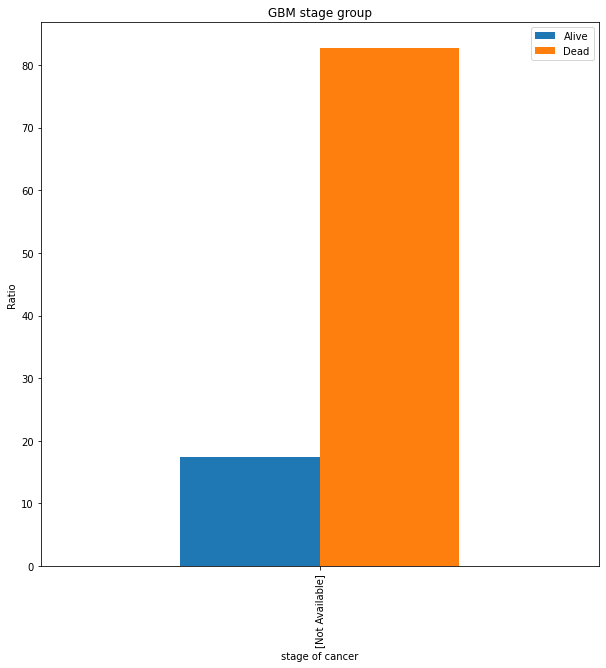

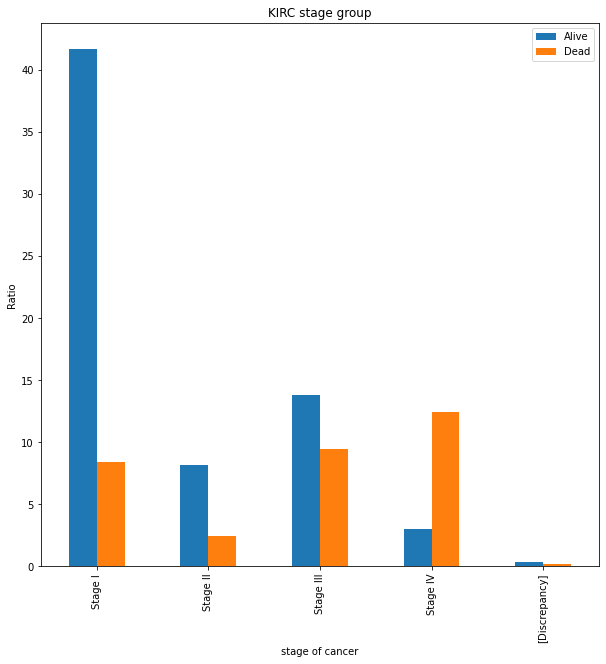

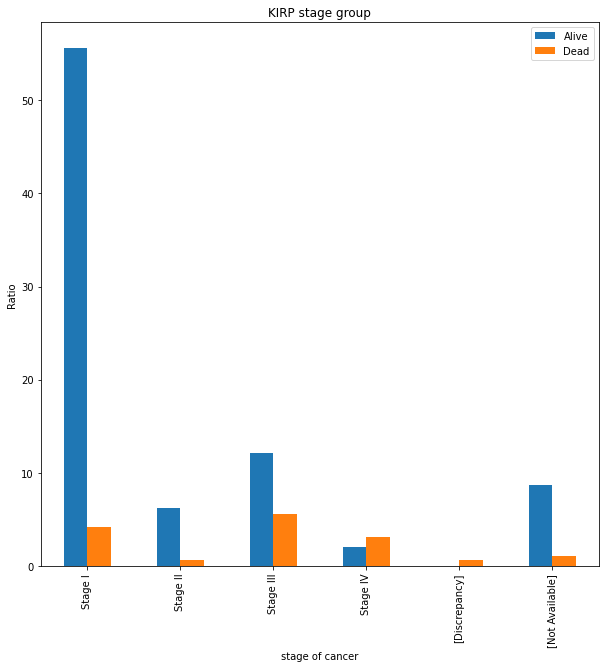

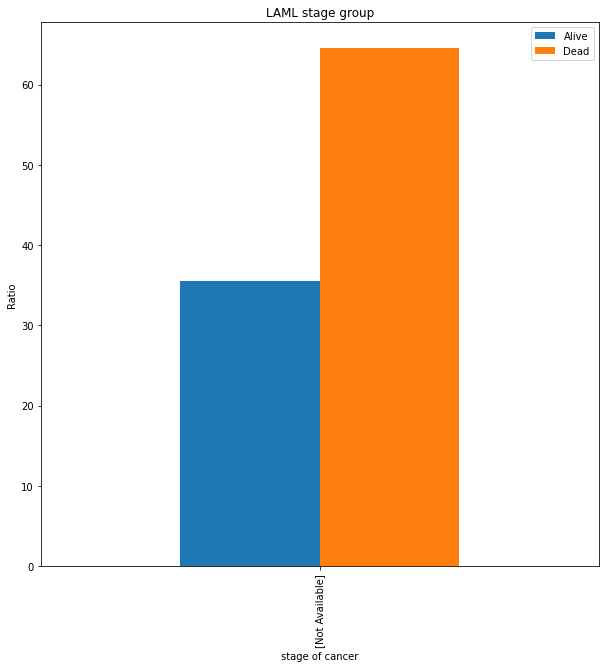

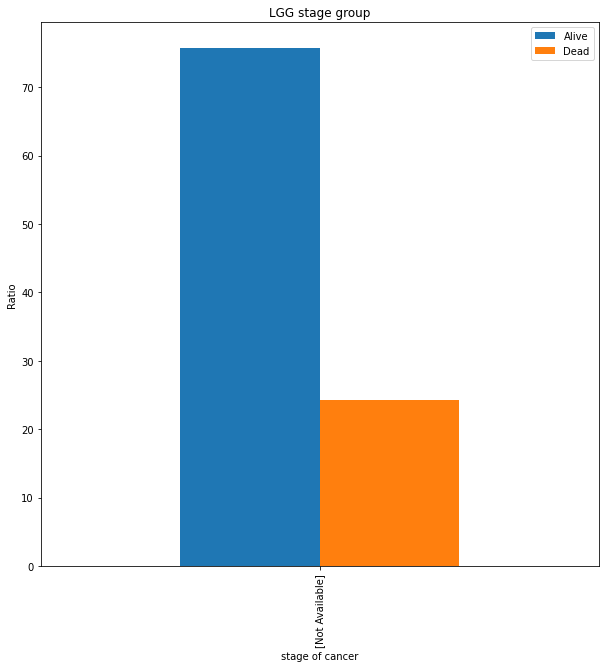

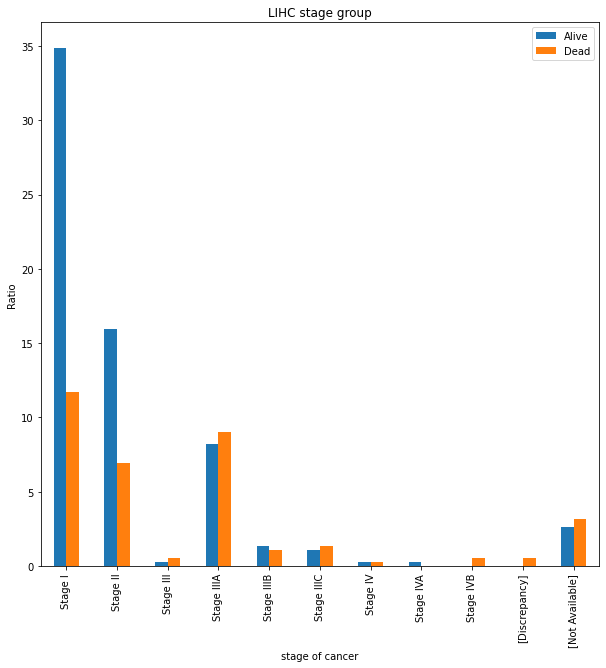

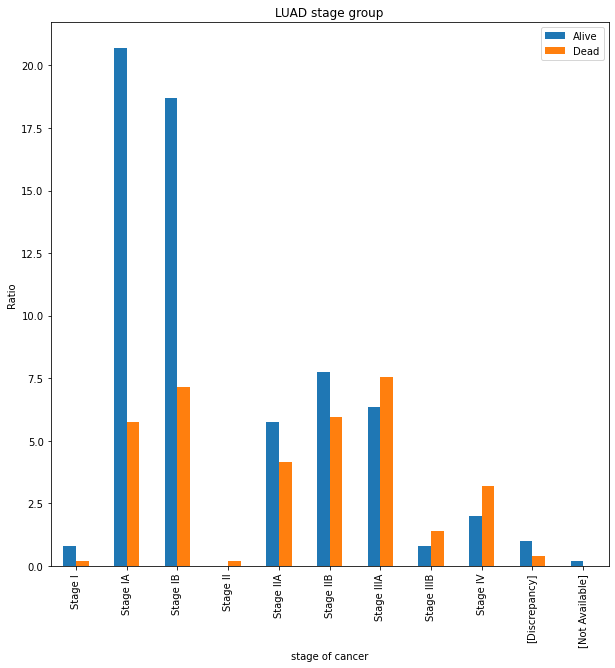

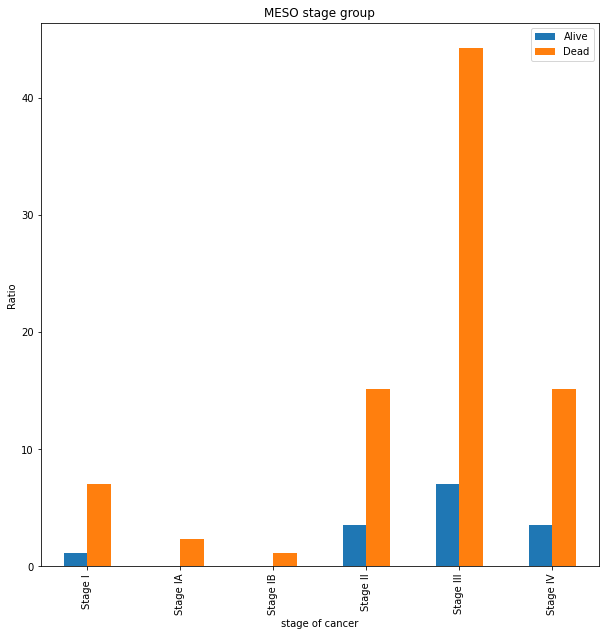

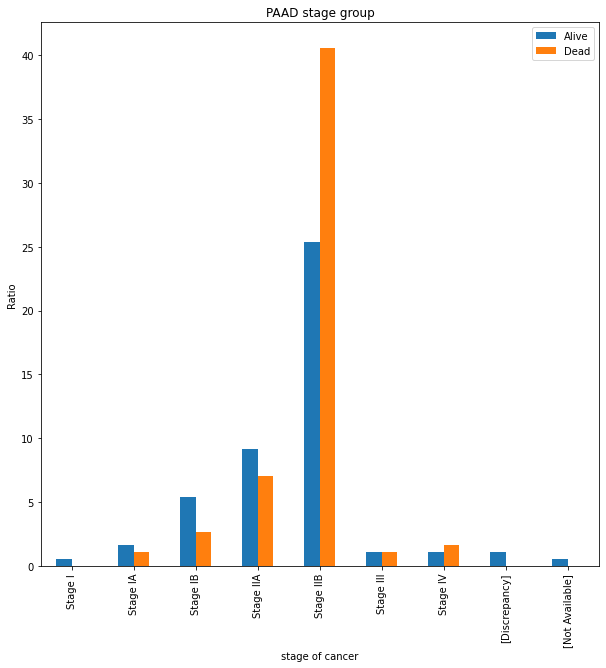

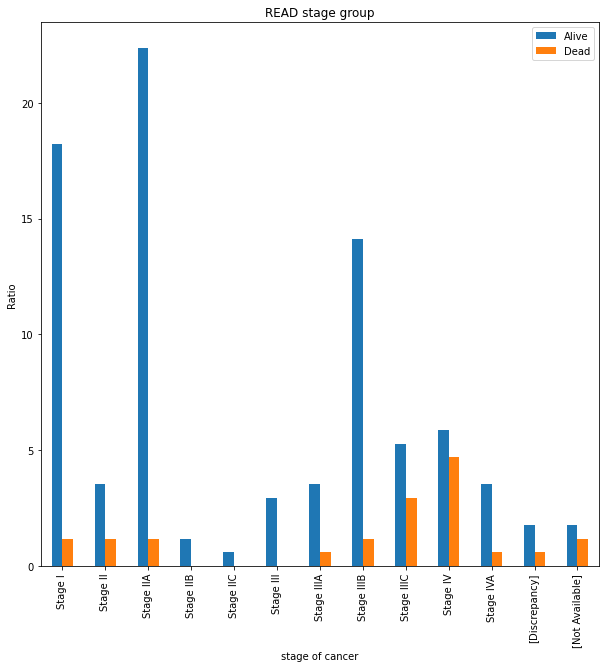

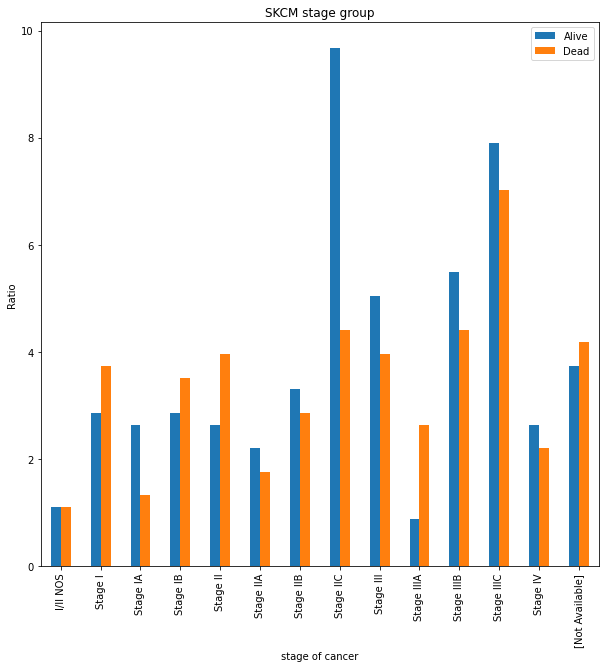

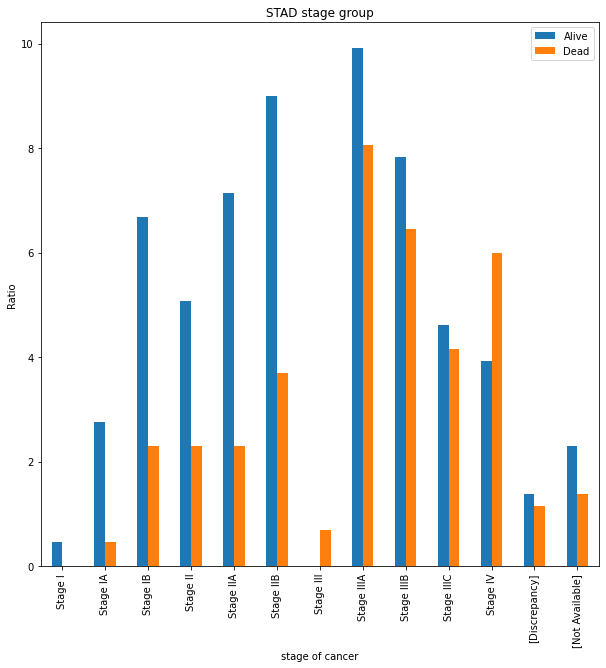

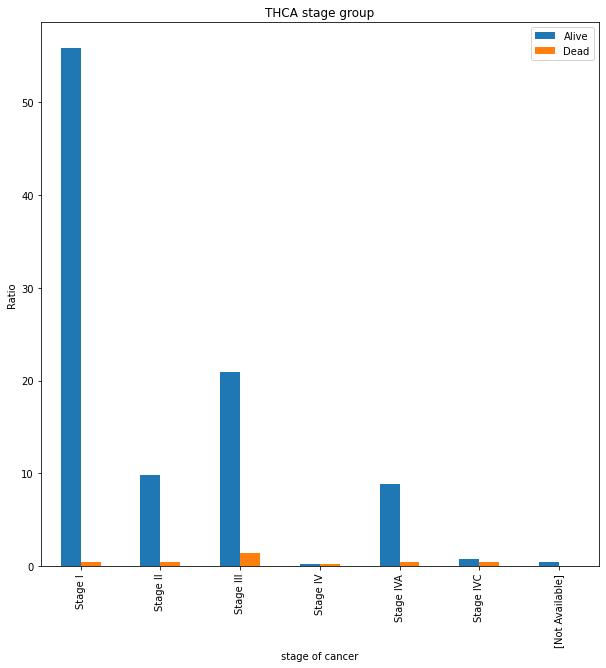

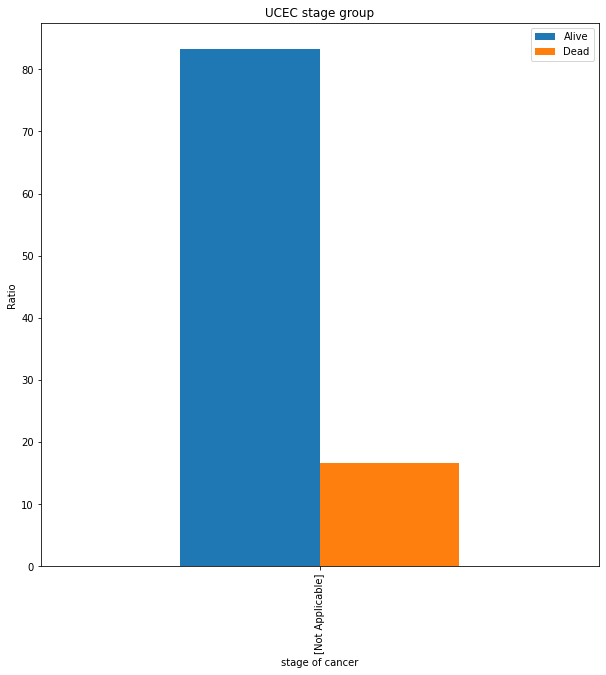

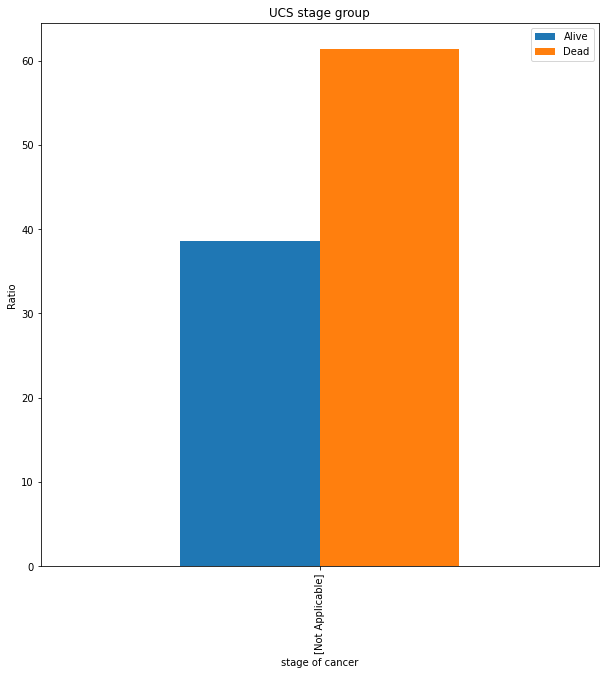

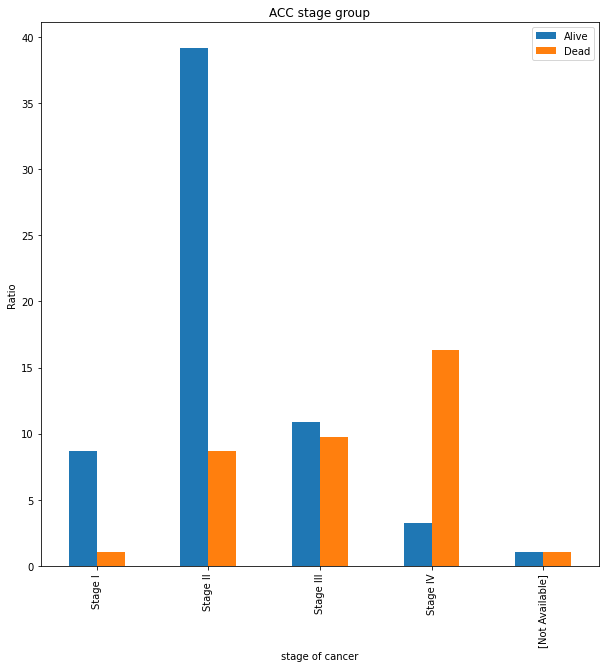

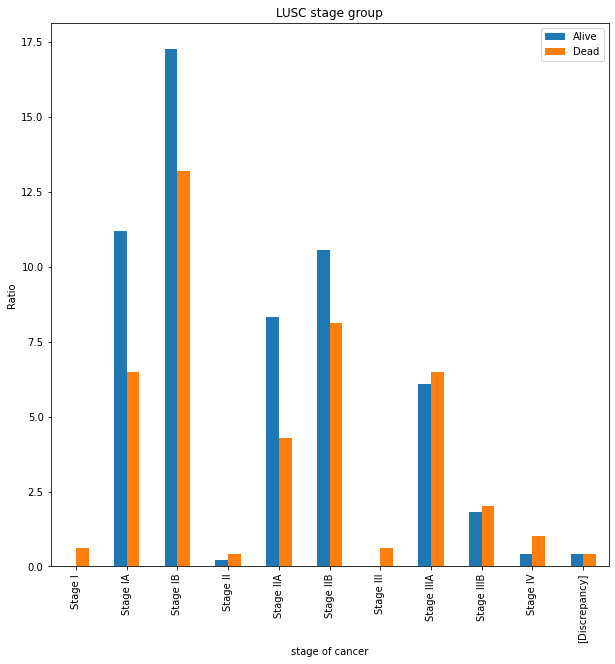

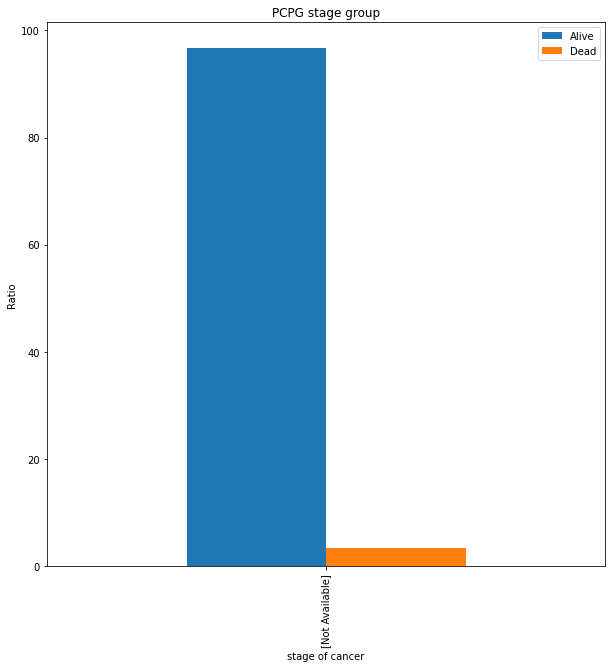

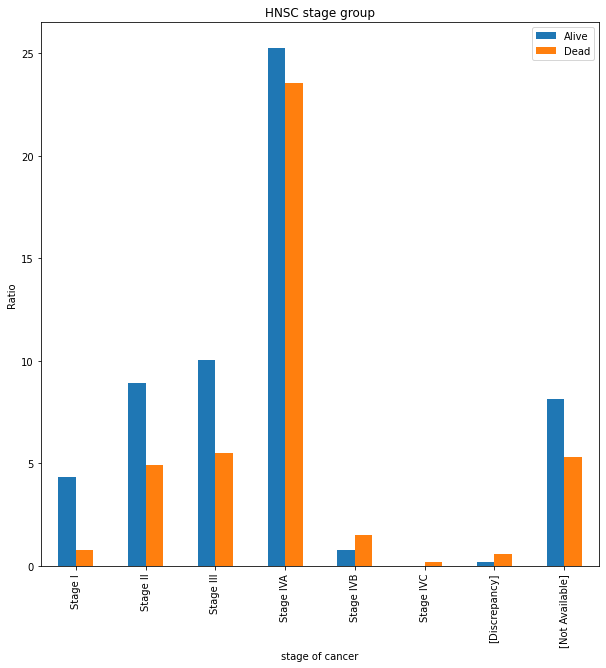

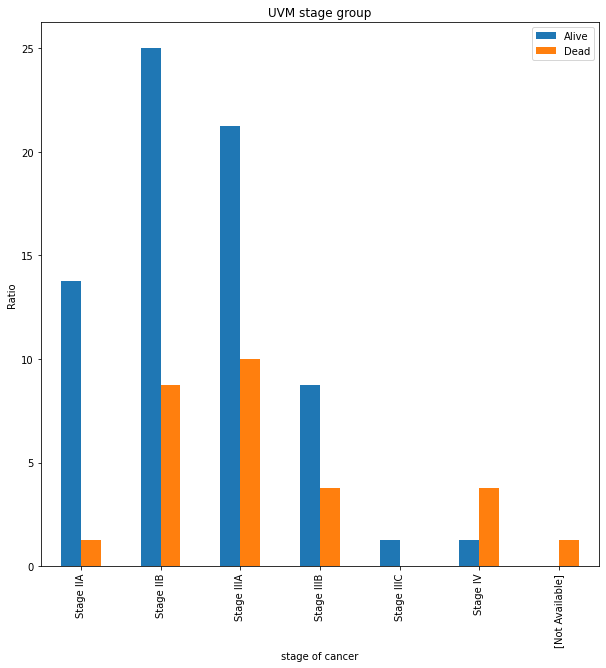

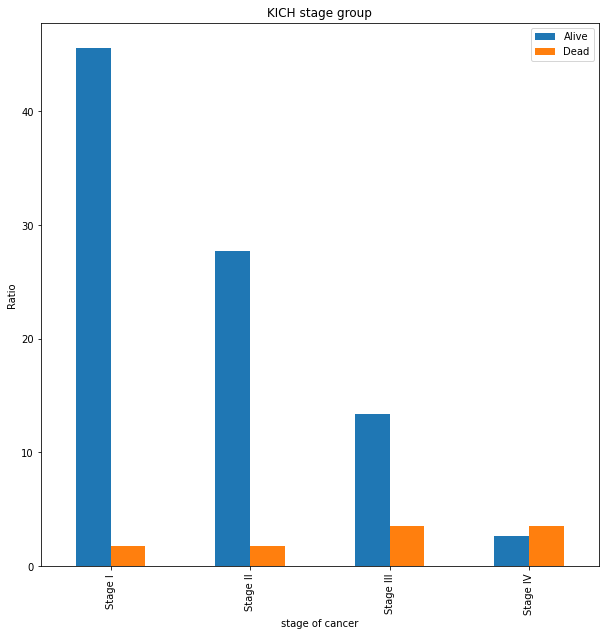

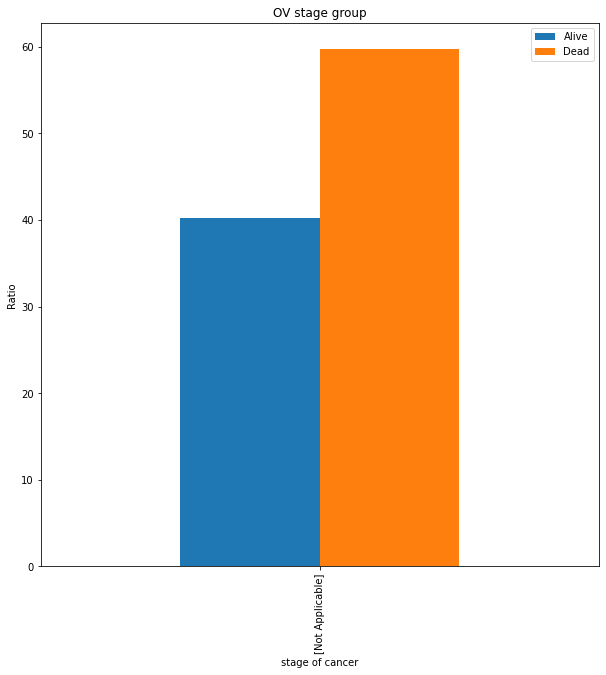

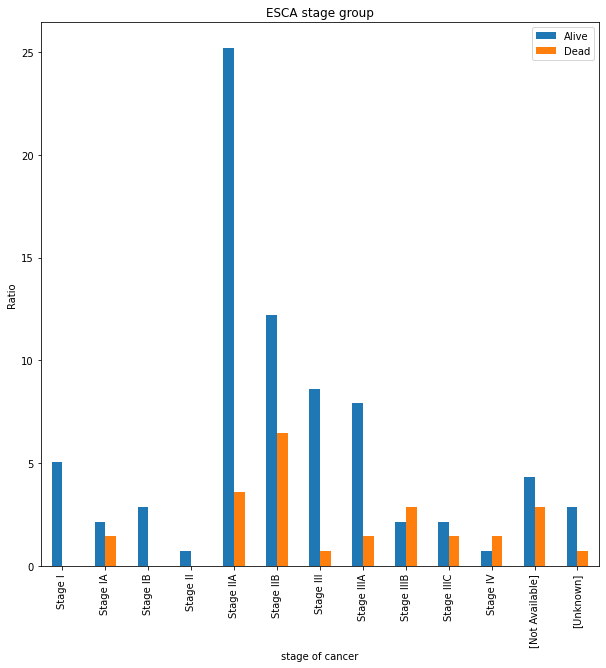

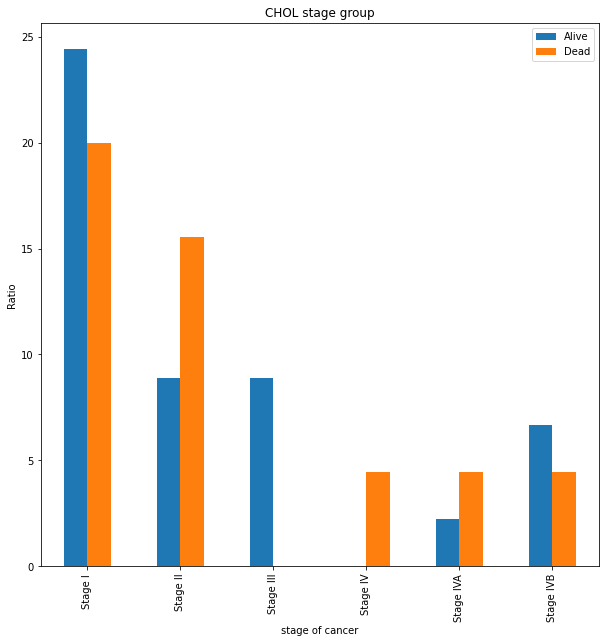

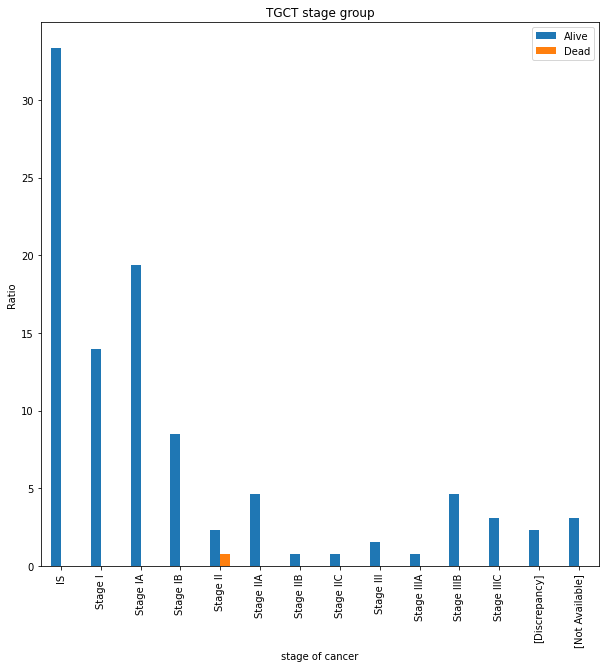

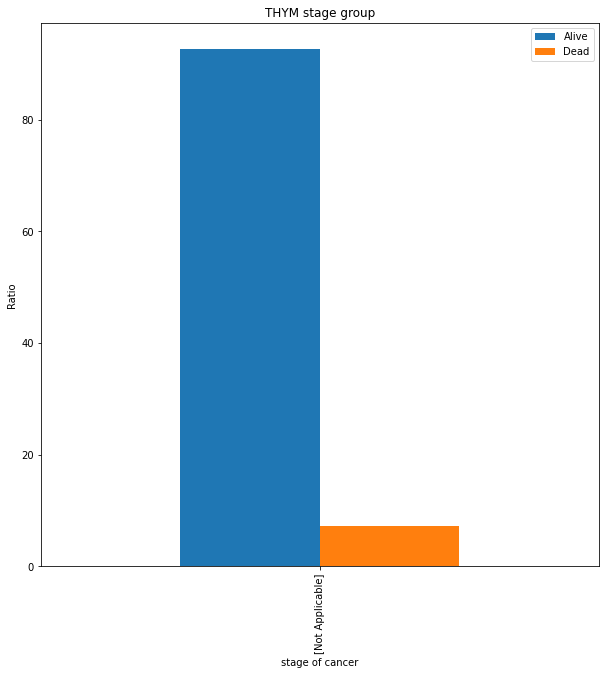

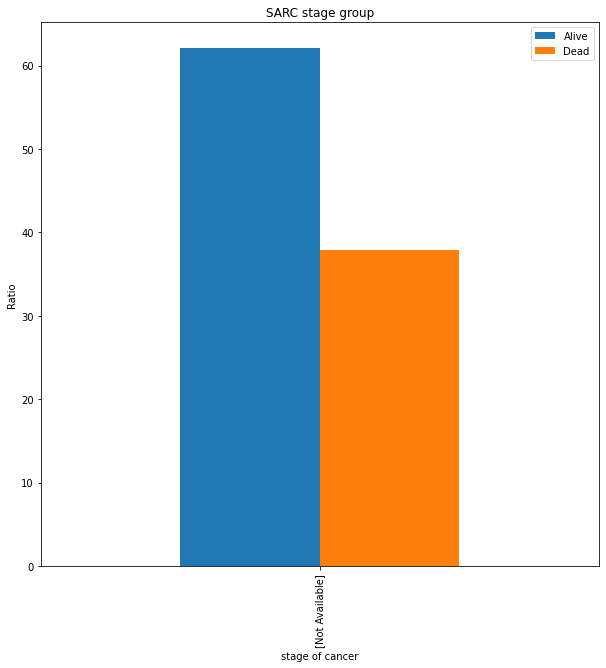

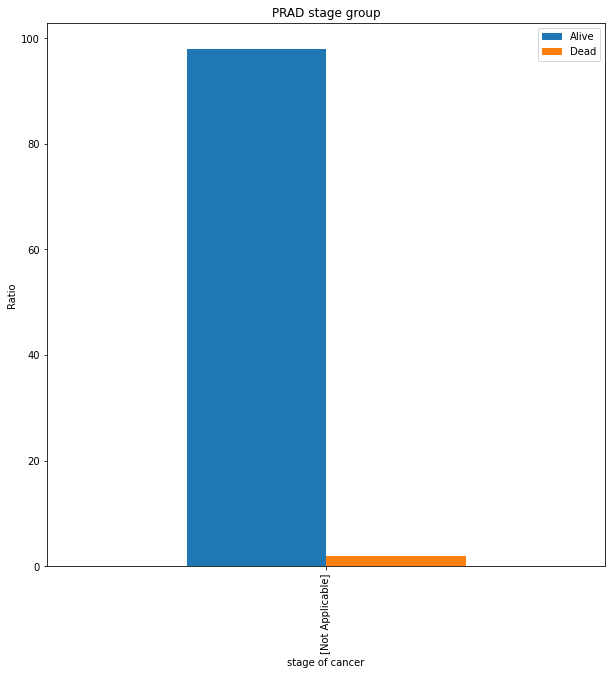

In [91]:
can = data['type'].unique()
for i in can:
    plt.rcParams["figure.figsize"] = (10,10)
    try:
        z4[i].unstack().plot(kind = 'bar') 
        plt.ylabel('Ratio')
        plt.title(i + ' stage group')
        plt.xlabel('stage of cancer')
        plt.legend(['Alive','Dead'])
        plt.plot()
        plt.savefig("test.png", format="png", dpi=300, bbox_inches='tight') 
        plt.show()
    except:
        continue

In [117]:
d = data['agerange'].unique()
a = data.query('age_at_initial_pathologic_diagnosis <50')

b = data.query('age_at_initial_pathologic_diagnosis >= 50')

kma = KaplanMeierFitter()
kme = KaplanMeierFitter()
#kma.fit(durations = Male['Delay'],event_observed = Male['Event'],label = 'Male')
#kme.fit(durations = Female['Delay'],event_observed = Female['Event'],label = 'Female')

Text(0.5, 1.0, 'age')

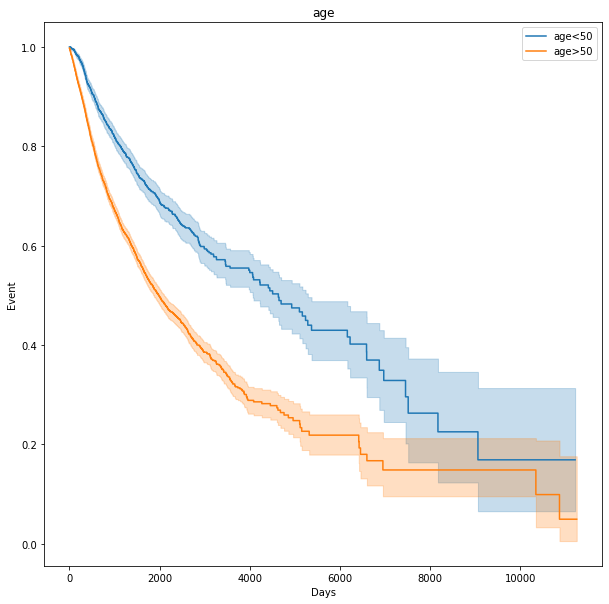

In [120]:

kma.fit(durations = a['Delay'],event_observed = a['Event'],label = 'age<50')
kme.fit(durations = b['Delay'],event_observed = b['Event'],label = 'age>50')
kma.plot()
kme.plot()
plt.xlabel('Days')
plt.ylabel('Event')
plt.title('age')

In [99]:
d

['81-85', '66-70', '76-80', '71-75', '41-45', ..., '36-40', '26-30', '16-20', '11-15', '5-10']
Length: 17
Categories (17, object): ['5-10' < '11-15' < '16-20' < '21-25' ... '71-75' < '76-80' < '81-85' < '86-90']

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11050,TCGA_CV_7410,HNSC,61.0,1,WHITE,Stage III,Dead,[Not Available],1.0,6417.0,61-65
11059,TCGA_W3_AA1W,SKCM,64.0,1,WHITE,Stage II,Alive,[Not Available],0.0,6666.0,61-65
11064,TCGA_B5_A1MR,UCEC,65.0,0,WHITE,[Not Applicable],Alive,Complete Remission/Response,0.0,6859.0,61-65
11067,TCGA_W3_A824,SKCM,63.0,1,WHITE,Stage I,Alive,[Not Available],0.0,6940.0,61-65


In [128]:
d = data['agerange'].unique()
a = data.query('age_at_initial_pathologic_diagnosis <50 & gender == 1')

b = data.query('age_at_initial_pathologic_diagnosis >= 50 & gender == 1') 

c = data.query('age_at_initial_pathologic_diagnosis <50 & gender == 0')

d = data.query('age_at_initial_pathologic_diagnosis >= 50 & gender == 0') 

kma = KaplanMeierFitter()
kme = KaplanMeierFitter()
kmd = KaplanMeierFitter()
kmc = KaplanMeierFitter()
#kma.fit(durations = Male['Delay'],event_observed = Male['Event'],label = 'Male')
#kme.fit(durations = Female['Delay'],event_observed = Female['Event'],label = 'Female')

Text(0.5, 1.0, 'age')

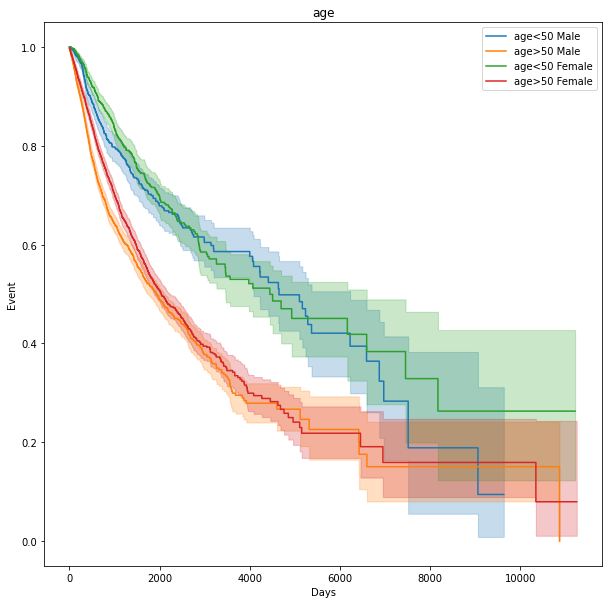

In [130]:
kma.fit(durations = a['Delay'],event_observed = a['Event'],label = 'age<50 Male')
kme.fit(durations = b['Delay'],event_observed = b['Event'],label = 'age>50 Male')
kmc.fit(durations = c['Delay'],event_observed = c['Event'],label = 'age<50 Female')
kmd.fit(durations = d['Delay'],event_observed = d['Event'],label = 'age>50 Female')
kma.plot()
kme.plot()
kmc.plot()
kmd.plot()
plt.xlabel('Days')
plt.ylabel('Event')
plt.title('age')

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
31,TCGA_AA_3712,COAD,65.0,1,[Not Available],Stage III,Alive,[Not Available],0.0,0.0,61-65
37,TCGA_CK_5915,COAD,63.0,1,WHITE,Stage I,Alive,[Not Available],0.0,0.0,61-65
39,TCGA_VB_A8QN,DLBC,55.0,1,WHITE,[Not Applicable],Alive,[Unknown],0.0,0.0,51-55
40,TCGA_RR_A6KB,GBM,51.0,1,BLACK OR AFRICAN AMERICAN,[Not Available],Alive,[Unknown],0.0,0.0,51-55
...,...,...,...,...,...,...,...,...,...,...,...
11063,TCGA_DA_A1I1,SKCM,55.0,1,WHITE,Stage III,Alive,[Not Available],0.0,6768.0,51-55
11067,TCGA_W3_A824,SKCM,63.0,1,WHITE,Stage I,Alive,[Not Available],0.0,6940.0,61-65
11071,TCGA_78_8640,LUAD,59.0,1,[Not Evaluated],Stage IIA,Alive,Complete Remission/Response,0.0,7062.0,56-60
11075,TCGA_78_7163,LUAD,60.0,1,WHITE,Stage IB,Alive,Complete Remission/Response,0.0,7248.0,56-60
